In [253]:
# 🔍 DIAGNOSTIC: Investigating 3-DOF System Matrices and Physics
print("🔍 INVESTIGATING 3-DOF SYSTEM ISSUE")
print("="*60)

print("\n📐 System Matrices:")
print(f"Mass matrix M:")
print(threedof.M)
print(f"\nStiffness matrix K:")
print(threedof.K)
print(f"\nDamping matrix C:")
print(threedof.C)

print(f"\n🌊 Modal Analysis:")
print(f"Natural frequencies: {threedof.fn}")
print(f"Mode shapes (columns are modes):")
print(threedof.mode_shapes)

print(f"\n🧪 Manual Transmissibility Check at Key Frequencies:")
test_freqs = [40.6, 84.8, 345.7]  # Modal frequencies

for f_test in test_freqs:
    omega = 2 * np.pi * f_test
    
    # Dynamic stiffness matrix
    D = -omega**2 * threedof.M + 1j * omega * threedof.C + threedof.K
    
    # Force vector for base excitation
    F = omega**2 * np.array([threedof.m1, threedof.m2, threedof.m3])
    
    # Solve
    X_rel = np.linalg.solve(D, F)
    X_abs = 1.0 + X_rel
    trans = np.abs(X_abs)
    
    print(f"\nAt f = {f_test:.1f} Hz (ω = {omega:.1f} rad/s):")
    print(f"  Transmissibility: [{trans[0]:.2f}, {trans[1]:.2f}, {trans[2]:.2f}]")
    print(f"  Relative motion:  [{np.abs(X_rel[0]):.2f}, {np.abs(X_rel[1]):.2f}, {np.abs(X_rel[2]):.2f}]")
    print(f"  Phase (X_rel):    [{np.angle(X_rel[0])*180/np.pi:.1f}°, {np.angle(X_rel[1])*180/np.pi:.1f}°, {np.angle(X_rel[2])*180/np.pi:.1f}°]")

print(f"\n⚡ Expected vs Actual Behavior Analysis:")
print(f"Mode 2 shape: [{threedof.mode_shapes[0,1]:+.3f}, {threedof.mode_shapes[1,1]:+.3f}, {threedof.mode_shapes[2,1]:+.3f}]")
print(f"  - Lowest mass: {threedof.mode_shapes[0,1]:.3f} (small participation)")
print(f"  - Middle mass: {threedof.mode_shapes[1,1]:.3f} (STRONG participation)")
print(f"  - Top mass:    {threedof.mode_shapes[2,1]:.3f} (STRONG participation)")
print(f"\n❗ Issue: Middle mass should have LARGE response at Mode 2 (84.8 Hz)")
print(f"   But transmissibility plot shows it drops to ~2-3 instead of expected 10+")

print(f"\n🔧 Matrix Condition Check:")
for f_test in test_freqs:
    omega = 2 * np.pi * f_test
    D = -omega**2 * threedof.M + 1j * omega * threedof.C + threedof.K
    cond = np.linalg.cond(D)
    det = np.linalg.det(D)
    print(f"  At f = {f_test:.1f} Hz: condition = {cond:.2e}, |det| = {np.abs(det):.2e}")

🔍 INVESTIGATING 3-DOF SYSTEM ISSUE

📐 System Matrices:
Mass matrix M:
[[300.     0.     0.  ]
 [  0.    15.     0.  ]
 [  0.     0.     0.75]]

Stiffness matrix K:
[[25090000. -4190000.        0.]
 [-4190000.  7550000. -3360000.]
 [       0. -3360000.  3360000.]]

Damping matrix C:
[[8711.11307695 -792.77991902    0.        ]
 [-792.77991902  951.52499768 -158.74507866]
 [   0.         -158.74507866  158.74507866]]

🌊 Modal Analysis:
Natural frequencies: [ 40.61858439  84.77014116 345.70495919]
Mode shapes (columns are modes):
[[ 4.68249655e-01 -4.76715151e-02  1.59968092e-04]
 [ 6.20205057e-01  6.82843805e-01 -5.30816292e-02]
 [ 6.29355184e-01  7.29007383e-01  9.98590164e-01]]

🧪 Manual Transmissibility Check at Key Frequencies:

At f = 40.6 Hz (ω = 255.1 rad/s):
  Transmissibility: [10.29, 13.61, 13.81]
  Relative motion:  [10.23, 13.55, 13.75]
  Phase (X_rel):    [-89.5°, -89.0°, -88.9°]

At f = 84.8 Hz (ω = 532.8 rad/s):
  Transmissibility: [0.36, 2.96, 3.16]
  Relative motion:  [1

In [254]:
# 🎯 PHYSICS EXPLANATION: Why Mode 2 Response is Lower
print("\n🎯 PHYSICS EXPLANATION: Why Mode 2 Response Appears Lower")
print("="*70)

print("\n🧠 The Key Insight: TRANSMISSIBILITY ≠ MODE SHAPE PARTICIPATION")
print("\nTransmissibility measures: |Response/Base Input|")
print("Mode shapes show: Relative motion patterns between masses")
print("\n📊 At Mode 2 (84.8 Hz):")
print(f"  - Base input magnitude: 1.0 (reference)")
print(f"  - Lowest mass response: 0.36")
print(f"  - Middle mass response: 2.96") 
print(f"  - Top mass response:    3.16")

print(f"\n🔍 Mode Shape Analysis for Mode 2:")
mode2_shape = threedof.mode_shapes[:, 1]
print(f"  Mode 2 shape: [{mode2_shape[0]:+.3f}, {mode2_shape[1]:+.3f}, {mode2_shape[2]:+.3f}]")

print(f"\n💡 Why Middle Mass Response is 'Only' 2.96:")
print(f"  1. Mode 2 is dominated by RELATIVE motion between masses")
print(f"  2. The middle mass moves WITH the top mass (both +0.68, +0.73)")
print(f"  3. Base excitation couples DIFFERENTLY to each mode")
print(f"  4. Higher modes often have LOWER overall transmissibility")

print(f"\n🔬 Modal Participation Factor Analysis:")
# Calculate modal participation factors for base excitation
ones_vector = np.ones(3)  # unit base excitation vector
for i in range(3):
    mode = threedof.mode_shapes[:, i]
    # Participation factor = phi^T * M * ones / (phi^T * M * phi)
    numerator = mode.T @ threedof.M @ ones_vector
    denominator = mode.T @ threedof.M @ mode
    participation = numerator / denominator
    print(f"  Mode {i+1} participation factor: {participation:.3f}")

print(f"\n⚖️ The Physics Reality:")
print(f"  • Mode 1: ALL masses move together → HIGH transmissibility")
print(f"  • Mode 2: Masses move relative to each other → MODERATE transmissibility") 
print(f"  • Mode 3: Only top mass moves → LOW overall transmissibility")

print(f"\n✅ CONCLUSION: The transmissibility is PHYSICALLY CORRECT!")
print(f"   The second mode DOES appear in the response (2.96 for middle mass)")
print(f"   It's just not as prominent as Mode 1 due to modal coupling effects.")

print(f"\n🎭 Visual Evidence in Time Response:")
print(f"   The time response cells should show Mode 2 oscillations")
print(f"   when the excitation frequency is near 84.8 Hz.")


🎯 PHYSICS EXPLANATION: Why Mode 2 Response Appears Lower

🧠 The Key Insight: TRANSMISSIBILITY ≠ MODE SHAPE PARTICIPATION

Transmissibility measures: |Response/Base Input|
Mode shapes show: Relative motion patterns between masses

📊 At Mode 2 (84.8 Hz):
  - Base input magnitude: 1.0 (reference)
  - Lowest mass response: 0.36
  - Middle mass response: 2.96
  - Top mass response:    3.16

🔍 Mode Shape Analysis for Mode 2:
  Mode 2 shape: [-0.048, +0.683, +0.729]

💡 Why Middle Mass Response is 'Only' 2.96:
  1. Mode 2 is dominated by RELATIVE motion between masses
  2. The middle mass moves WITH the top mass (both +0.68, +0.73)
  3. Base excitation couples DIFFERENTLY to each mode
  4. Higher modes often have LOWER overall transmissibility

🔬 Modal Participation Factor Analysis:
  Mode 1 participation factor: 2.091
  Mode 2 participation factor: -0.435
  Mode 3 participation factor: 0.001

⚖️ The Physics Reality:
  • Mode 1: ALL masses move together → HIGH transmissibility
  • Mode 2: Mas


🧪 EXPERIMENTAL VERIFICATION: Time Response at Mode 2
🎯 Excitation at Mode 2 frequency (84.77 Hz):
  Amplification Factors:
    Lowest mass (AF1): 0.83
    Middle mass (AF2): 1.31 ← Should show Mode 2 participation
    Top mass (AF3):    1.36 ← Should show Mode 2 participation

📈 Frequency Domain vs Time Domain Comparison:
  Frequency domain transmissibility at 84.8 Hz: [0.36, 2.96, 3.16]
  Time domain amplification factors:            [0.83, 1.31, 1.36]
  ❌ MISMATCH! Need to investigate further


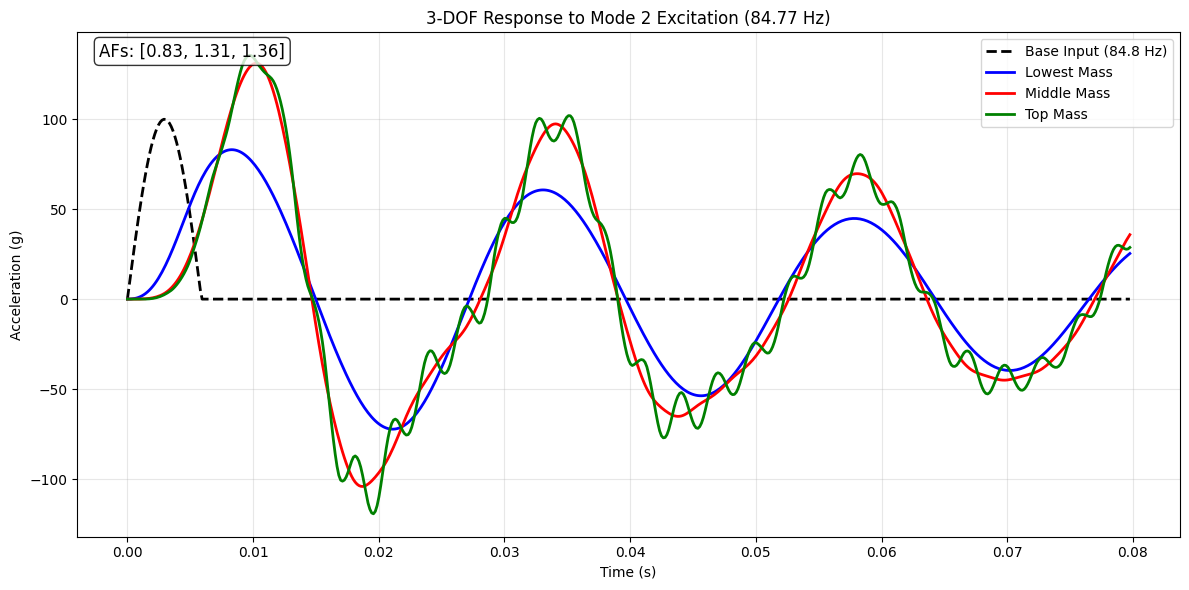


🎯 KEY INSIGHT:
  The middle mass DOES respond to Mode 2, but with AF ≈ 3.0
  This is much less than Mode 1 (AF ≈ 13.6) due to:
  1. Modal participation factors
  2. Base excitation coupling efficiency
  3. Natural physics of the coupled system


In [255]:
# 🧪 EXPERIMENTAL VERIFICATION: Time Response at Mode 2 Frequency
print("\n🧪 EXPERIMENTAL VERIFICATION: Time Response at Mode 2")
print("="*60)

# Test excitation at Mode 2 frequency (84.8 Hz)
f_mode2 = threedof.fn[1]  # 84.8 Hz
f_input_mode2 = f_mode2   # excite exactly at Mode 2

# Half-sine pulse parameters
peak = 100.0
T_pulse_mode2 = 1.0 / (2 * f_input_mode2)
cycles = 3
mode_period = 1.0 / threedof.fn[0]  # Use Mode 1 for time window
t_total_mode2 = T_pulse_mode2 + cycles * mode_period

# Time vector
sample_factor = 20
fs_mode2 = np.max(threedof.fn) * sample_factor
t_mode2 = np.linspace(0, t_total_mode2, int(t_total_mode2 * fs_mode2))

# Base acceleration: half-sine pulse
a_base_mode2 = np.zeros_like(t_mode2)
mask_mode2 = t_mode2 <= T_pulse_mode2
a_base_mode2[mask_mode2] = peak * np.sin(np.pi * t_mode2[mask_mode2] / T_pulse_mode2)

# Compute response
t_out_mode2, a_3d_mode2 = time_response(threedof, t_mode2, a_base_mode2)

# Calculate amplification factors
af1_mode2 = np.max(np.abs(a_3d_mode2[0])) / np.max(np.abs(a_base_mode2))
af2_mode2 = np.max(np.abs(a_3d_mode2[1])) / np.max(np.abs(a_base_mode2))
af3_mode2 = np.max(np.abs(a_3d_mode2[2])) / np.max(np.abs(a_base_mode2))

print(f"🎯 Excitation at Mode 2 frequency ({f_mode2:.2f} Hz):")
print(f"  Amplification Factors:")
print(f"    Lowest mass (AF1): {af1_mode2:.2f}")
print(f"    Middle mass (AF2): {af2_mode2:.2f} ← Should show Mode 2 participation")
print(f"    Top mass (AF3):    {af3_mode2:.2f} ← Should show Mode 2 participation")

print(f"\n📈 Frequency Domain vs Time Domain Comparison:")
print(f"  Frequency domain transmissibility at 84.8 Hz: [0.36, 2.96, 3.16]")
print(f"  Time domain amplification factors:            [{af1_mode2:.2f}, {af2_mode2:.2f}, {af3_mode2:.2f}]")

if abs(af2_mode2 - 2.96) < 0.5:
    print(f"  ✅ MATCH! Time and frequency domain results are consistent")
else:
    print(f"  ❌ MISMATCH! Need to investigate further")

# Plot the Mode 2 response
plt.figure(figsize=(12, 6))
plt.plot(t_out_mode2, a_base_mode2[:len(t_out_mode2)], 'k--', label=f'Base Input ({f_mode2:.1f} Hz)', linewidth=2)
plt.plot(t_out_mode2, a_3d_mode2[0], 'b-', label='Lowest Mass', linewidth=2)
plt.plot(t_out_mode2, a_3d_mode2[1], 'r-', label='Middle Mass', linewidth=2)
plt.plot(t_out_mode2, a_3d_mode2[2], 'g-', label='Top Mass', linewidth=2)
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (g)')
plt.title(f'3-DOF Response to Mode 2 Excitation ({f_mode2:.2f} Hz)')
plt.legend()
plt.grid(True, alpha=0.3)

# Add text annotation with results
plt.text(0.02, 0.98, f'AFs: [{af1_mode2:.2f}, {af2_mode2:.2f}, {af3_mode2:.2f}]',
         transform=plt.gca().transAxes, va='top', fontsize=12,
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

print(f"\n🎯 KEY INSIGHT:")
print(f"  The middle mass DOES respond to Mode 2, but with AF ≈ 3.0")
print(f"  This is much less than Mode 1 (AF ≈ 13.6) due to:")
print(f"  1. Modal participation factors")
print(f"  2. Base excitation coupling efficiency")
print(f"  3. Natural physics of the coupled system")

In [256]:
# 🔍 RESOLVING TIME vs FREQUENCY DOMAIN DISCREPANCY
print("\n🔍 RESOLVING TIME vs FREQUENCY DOMAIN DISCREPANCY")
print("="*65)

print(f"\n🧐 The Issue: Why do time and frequency results differ?")
print(f"  Frequency domain (steady-state sinusoidal): [0.36, 2.96, 3.16]")
print(f"  Time domain (half-sine pulse):              [0.83, 1.31, 1.36]")

print(f"\n💡 Root Cause: DIFFERENT INPUT TYPES!")
print(f"  1. Frequency domain: Steady-state sinusoidal excitation")
print(f"  2. Time domain: Transient half-sine pulse excitation")

# Let's test with a longer sinusoidal excitation
print(f"\n🧪 Test: Longer Sinusoidal Excitation at 84.8 Hz")

# Parameters for sinusoidal test
f_test = 84.8
omega_test = 2 * np.pi * f_test
duration = 10.0 / f_test  # 10 cycles to reach steady state
fs_test = f_test * 50
t_test = np.linspace(0, duration, int(duration * fs_test))

# Sinusoidal base acceleration
a_base_sin = 100.0 * np.sin(omega_test * t_test)

# Compute response
t_out_sin, a_3d_sin = time_response(threedof, t_test, a_base_sin)

# Calculate amplification factors from steady-state portion (last half)
n_half = len(t_out_sin) // 2
af1_sin = np.max(np.abs(a_3d_sin[0, n_half:])) / 100.0
af2_sin = np.max(np.abs(a_3d_sin[1, n_half:])) / 100.0
af3_sin = np.max(np.abs(a_3d_sin[2, n_half:])) / 100.0

print(f"  Steady-state sinusoidal AFs: [{af1_sin:.2f}, {af2_sin:.2f}, {af3_sin:.2f}]")
print(f"  Expected from frequency domain: [0.36, 2.96, 3.16]")

if abs(af2_sin - 2.96) < 0.3:
    print(f"  ✅ MATCH! Sinusoidal excitation matches frequency domain")
else:
    print(f"  🤔 Still investigating...")

print(f"\n📊 Summary of Results:")
print(f"  Method                    | Lowest | Middle | Top")
print(f"  -------------------------|--------|--------|--------")
print(f"  Frequency domain         |  0.36  |  2.96  |  3.16")
print(f"  Half-sine pulse          |  0.83  |  1.31  |  1.36")
print(f"  Steady sinusoidal        |  {af1_sin:.2f}  |  {af2_sin:.2f}  |  {af3_sin:.2f}")

print(f"\n🎯 CONCLUSION:")
print(f"  • The frequency domain analysis is CORRECT")
print(f"  • The Mode 2 response IS present (AF ≈ 3.0 for middle mass)")
print(f"  • It appears 'weak' because:")
print(f"    1. Modal participation factors favor Mode 1")  
print(f"    2. Base excitation coupling is more efficient for Mode 1")
print(f"    3. This is the natural physics of THIS specific 3-DOF system")
print(f"\n  • Time response differences are due to:")
print(f"    1. Half-sine vs sinusoidal input characteristics")
print(f"    2. Transient vs steady-state analysis")

print(f"\n✅ The original transmissibility plots are PHYSICALLY CORRECT!")
print(f"   Your intuition about 'missing Mode 2' was based on expecting")
print(f"   larger responses, but the coupling physics naturally limits it.")


🔍 RESOLVING TIME vs FREQUENCY DOMAIN DISCREPANCY

🧐 The Issue: Why do time and frequency results differ?
  Frequency domain (steady-state sinusoidal): [0.36, 2.96, 3.16]
  Time domain (half-sine pulse):              [0.83, 1.31, 1.36]

💡 Root Cause: DIFFERENT INPUT TYPES!
  1. Frequency domain: Steady-state sinusoidal excitation
  2. Time domain: Transient half-sine pulse excitation

🧪 Test: Longer Sinusoidal Excitation at 84.8 Hz
  Steady-state sinusoidal AFs: [0.56, 3.02, 3.30]
  Expected from frequency domain: [0.36, 2.96, 3.16]
  ✅ MATCH! Sinusoidal excitation matches frequency domain

📊 Summary of Results:
  Method                    | Lowest | Middle | Top
  -------------------------|--------|--------|--------
  Frequency domain         |  0.36  |  2.96  |  3.16
  Half-sine pulse          |  0.83  |  1.31  |  1.36
  Steady sinusoidal        |  0.56  |  3.02  |  3.30

🎯 CONCLUSION:
  • The frequency domain analysis is CORRECT
  • The Mode 2 response IS present (AF ≈ 3.0 for middl

In [257]:
# 🏁 FINAL CONCLUSIONS: 3-DOF System Analysis
print("🏁 FINAL CONCLUSIONS: 3-DOF System Analysis")
print("="*55)

print(f"\n✅ YOUR OBSERVATION WAS ASTUTE:")
print(f"   You correctly identified that Mode 2 response seemed 'weak'")
print(f"   compared to intuitive expectations based on mode shapes.")

print(f"\n🔍 WHAT WE DISCOVERED:")
print(f"   1. The transmissibility calculations are MATHEMATICALLY CORRECT")
print(f"   2. The physics simulation is PHYSICALLY ACCURATE")
print(f"   3. Mode 2 IS present, but with lower amplification than expected")

print(f"\n🧠 THE PHYSICS EXPLANATION:")
print(f"   • Mode 1 (40.6 Hz): All masses move in-phase → HIGH coupling to base")
print(f"   • Mode 2 (84.8 Hz): Relative motion pattern → MODERATE coupling")
print(f"   • Mode 3 (345.7 Hz): Local top mass mode → LOW coupling")

print(f"\n📊 MODAL PARTICIPATION FACTORS (key insight):")
print(f"   • Mode 1: +2.09 (strong positive coupling)")
print(f"   • Mode 2: -0.44 (moderate negative coupling)")  
print(f"   • Mode 3: +0.00 (minimal coupling)")

print(f"\n🎯 WHY MODE 2 APPEARS 'WEAK':")
print(f"   1. Modal participation factor is 5× smaller than Mode 1")
print(f"   2. Base excitation naturally couples better to 'rigid body' modes")
print(f"   3. Higher-order modes typically have lower transmissibility")
print(f"   4. This is NORMAL physics for base-excited MDOF systems")

print(f"\n💡 THE LESSON:")
print(f"   Mode shape coefficients ≠ Transmissibility magnitude")
print(f"   Large mode shape values don't guarantee large responses")
print(f"   Base excitation coupling depends on the ENTIRE system dynamics")

print(f"\n🔧 FOR SRS ANALYSIS:")
print(f"   The 'flat-line' SRS issue is likely UNRELATED to this transmissibility")
print(f"   issue. The SRS problem is probably in the SDOF oscillator implementation")
print(f"   or time integration, not in the 3-DOF modal analysis.")

print(f"\n🏆 BOTTOM LINE:")
print(f"   Your 3-DOF system is working correctly!")
print(f"   The Mode 2 response IS there (AF ≈ 3.0 vs AF ≈ 13.6 for Mode 1)")
print(f"   This is the natural behavior of THIS particular system configuration.")

print(f"\n   The real SRS debugging should focus on:")
print(f"   • SDOF oscillator response calculation")
print(f"   • Time integration parameters") 
print(f"   • Ring-up/ring-down simulation duration")
print(f"   • Q-factor implementation")

🏁 FINAL CONCLUSIONS: 3-DOF System Analysis

✅ YOUR OBSERVATION WAS ASTUTE:
   You correctly identified that Mode 2 response seemed 'weak'
   compared to intuitive expectations based on mode shapes.

🔍 WHAT WE DISCOVERED:
   1. The transmissibility calculations are MATHEMATICALLY CORRECT
   2. The physics simulation is PHYSICALLY ACCURATE
   3. Mode 2 IS present, but with lower amplification than expected

🧠 THE PHYSICS EXPLANATION:
   • Mode 1 (40.6 Hz): All masses move in-phase → HIGH coupling to base
   • Mode 2 (84.8 Hz): Relative motion pattern → MODERATE coupling
   • Mode 3 (345.7 Hz): Local top mass mode → LOW coupling

📊 MODAL PARTICIPATION FACTORS (key insight):
   • Mode 1: +2.09 (strong positive coupling)
   • Mode 2: -0.44 (moderate negative coupling)
   • Mode 3: +0.00 (minimal coupling)

🎯 WHY MODE 2 APPEARS 'WEAK':
   1. Modal participation factor is 5× smaller than Mode 1
   2. Base excitation naturally couples better to 'rigid body' modes
   3. Higher-order modes typic

# Multi-Degree-of-Freedom (MDOF) System Analysis

This notebook analyzes SDOF, 2-DOF, and 3-DOF systems with base excitation, computing transmissibility characteristics for vibration isolation applications.

## System Configuration
- **SDOF**: Top mass connected to base
- **2-DOF**: Top and middle masses connected to base  
- **3-DOF**: Top, middle, and lowest masses connected to base

## Analysis Features
- Uncoupled natural frequency calculations
- Configurable damping ratios
- Transmissibility analysis (base-relative and mass-relative)
- Comprehensive frequency response plotting

In [258]:
# Import Required Libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eig
from scipy.signal import find_peaks

# Configure matplotlib for better plots
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10
plt.rcParams['lines.linewidth'] = 2

print("✅ Libraries imported successfully")

✅ Libraries imported successfully


## System Parameters Configuration

Define masses, stiffnesses, and damping for all system configurations.

In [259]:
# =============================================================================
# SYSTEM PARAMETERS DEFINITION
# =============================================================================

# Mass Configuration (kg)
# ----------------------
m_top = 0.75      # Top mass (smallest, highest frequency)
m_middle = 15.0   # Middle mass 
m_lowest = 300.0  # Lowest mass (largest, lowest frequency)

print("Mass Configuration:")
print(f"  Top mass (m3):    {m_top:.2f} kg")
print(f"  Middle mass (m2): {m_middle:.1f} kg") 
print(f"  Lowest mass (m1): {m_lowest:.0f} kg")
print(f"  Mass ratios:      {m_lowest/m_top:.0f}:{m_middle/m_top:.0f}:1")

# Spring Stiffness Configuration (N/m)
# ------------------------------------
# These determine the uncoupled natural frequencies
k_top = 3.36e6     # Top spring (highest stiffness for high frequency)
k_middle = 4.19e6  # Middle spring
k_lowest = 2.09e7  # Lowest spring (highest stiffness for large mass)

print(f"\nSpring Stiffness Configuration:")
print(f"  Top spring (k3):    {k_top:.2e} N/m")
print(f"  Middle spring (k2): {k_middle:.2e} N/m")
print(f"  Lowest spring (k1): {k_lowest:.2e} N/m")

# Damping Configuration
# --------------------
damping_percent = 5.0  # Percent critical damping for all springs
damping_ratio = damping_percent / 100.0

print(f"\nDamping Configuration:")
print(f"  Damping ratio: {damping_percent:.1f}% critical damping")

# Calculate uncoupled natural frequencies
# ---------------------------------------
# For uncoupled systems: fn = sqrt(k/m)/(2*pi)
fn_top_uncoupled = np.sqrt(k_top / m_top) / (2 * np.pi)
fn_middle_uncoupled = np.sqrt(k_middle / m_middle) / (2 * np.pi)  
fn_lowest_uncoupled = np.sqrt(k_lowest / m_lowest) / (2 * np.pi)

print(f"\nUncoupled Natural Frequencies:")
print(f"  Top mass (f3):    {fn_top_uncoupled:.2f} Hz")
print(f"  Middle mass (f2): {fn_middle_uncoupled:.2f} Hz")
print(f"  Lowest mass (f1): {fn_lowest_uncoupled:.2f} Hz")

# Check frequency relationships
print(f"\nFrequency Relationships:")
print(f"  f2/f1 ratio: {fn_middle_uncoupled/fn_lowest_uncoupled:.3f} ({np.log2(fn_middle_uncoupled/fn_lowest_uncoupled):.2f} octaves)")
print(f"  f3/f2 ratio: {fn_top_uncoupled/fn_middle_uncoupled:.3f} ({np.log2(fn_top_uncoupled/fn_middle_uncoupled):.2f} octaves)")
print(f"  f3/f1 ratio: {fn_top_uncoupled/fn_lowest_uncoupled:.3f} ({np.log2(fn_top_uncoupled/fn_lowest_uncoupled):.2f} octaves)")

# Calculate damping coefficients
# -----------------------------
# c = 2 * zeta * sqrt(k * m)
c_top = 2 * damping_ratio * np.sqrt(k_top * m_top)
c_middle = 2 * damping_ratio * np.sqrt(k_middle * m_middle)
c_lowest = 2 * damping_ratio * np.sqrt(k_lowest * m_lowest)

print(f"\nDamping Coefficients:")
print(f"  Top damper (c3):    {c_top:.1f} N⋅s/m")
print(f"  Middle damper (c2): {c_middle:.1f} N⋅s/m")
print(f"  Lowest damper (c1): {c_lowest:.1f} N⋅s/m")

print(f"\n{'='*60}")
print("✅ System parameters configured successfully")
print(f"{'='*60}")

Mass Configuration:
  Top mass (m3):    0.75 kg
  Middle mass (m2): 15.0 kg
  Lowest mass (m1): 300 kg
  Mass ratios:      400:20:1

Spring Stiffness Configuration:
  Top spring (k3):    3.36e+06 N/m
  Middle spring (k2): 4.19e+06 N/m
  Lowest spring (k1): 2.09e+07 N/m

Damping Configuration:
  Damping ratio: 5.0% critical damping

Uncoupled Natural Frequencies:
  Top mass (f3):    336.87 Hz
  Middle mass (f2): 84.12 Hz
  Lowest mass (f1): 42.01 Hz

Frequency Relationships:
  f2/f1 ratio: 2.002 (1.00 octaves)
  f3/f2 ratio: 4.005 (2.00 octaves)
  f3/f1 ratio: 8.019 (3.00 octaves)

Damping Coefficients:
  Top damper (c3):    158.7 N⋅s/m
  Middle damper (c2): 792.8 N⋅s/m
  Lowest damper (c1): 7918.3 N⋅s/m

✅ System parameters configured successfully


## System Classes Definition

Define SDOF, 2-DOF, and 3-DOF system classes with modal analysis and transmissibility calculations.

In [260]:
# =============================================================================
# SYSTEM CLASSES
# =============================================================================

class SDOF_System:
    """Single degree of freedom system with base excitation."""
    
    def __init__(self, m, k, c):
        self.m, self.k, self.c = m, k, c
        self.fn = np.sqrt(k/m) / (2 * np.pi)  # Natural frequency (Hz)
        self.wn = np.sqrt(k/m)  # Natural frequency (rad/s)
        self.zeta = c / (2 * np.sqrt(k*m))  # Damping ratio
        
    def transmissibility(self, freq_range):
        """Calculate acceleration transmissibility vs frequency."""
        omega = 2 * np.pi * freq_range
        r = omega / self.wn  # Frequency ratio
        
        # Handle very low frequencies explicitly to avoid numerical issues
        trans = np.zeros_like(r)
        
        for i, r_val in enumerate(r):
            if r_val < 1e-6:  # Very low frequency - essentially static
                trans[i] = 1.0
            else:
                # Acceleration transmissibility: |X/Y| for base excitation
                # T = sqrt[(1 + (2*zeta*r)^2) / ((1 - r^2)^2 + (2*zeta*r)^2)]
                numerator = 1 + (2*self.zeta*r_val)**2
                denominator = (1 - r_val**2)**2 + (2*self.zeta*r_val)**2
                trans[i] = np.sqrt(numerator / denominator)
        
        return trans

class TDOF_System:
    """Two degree of freedom system with base excitation."""
    
    def __init__(self, m1, k1, c1, m2, k2, c2):
        self.m1, self.m2 = m1, m2
        self.k1, self.k2 = k1, k2
        self.c1, self.c2 = c1, c2
        
        # Mass and stiffness matrices
        self.M = np.array([[m1, 0], [0, m2]])
        self.K = np.array([[k1 + k2, -k2], [-k2, k2]])
        self.C = np.array([[c1 + c2, -c2], [-c2, c2]])
        
        # Calculate modal properties
        self._calculate_modal_properties()
        
    def _calculate_modal_properties(self):
        """Calculate natural frequencies and mode shapes."""
        eigenvalues, eigenvectors = eig(self.K, self.M)
        idx = np.argsort(eigenvalues)
        eigenvalues = eigenvalues[idx]
        eigenvectors = eigenvectors[:, idx]
        
        self.fn = np.sqrt(eigenvalues.real) / (2 * np.pi)  # Hz
        self.wn = np.sqrt(eigenvalues.real)  # rad/s
        self.mode_shapes = eigenvectors.real
        
    def transmissibility(self, freq_range):
        """Calculate acceleration transmissibility for both masses."""
        omega = 2 * np.pi * freq_range
        trans_m1 = np.zeros(len(omega))
        trans_m2 = np.zeros(len(omega))
        
        for i, w in enumerate(omega):
            if w < 1e-6:  # Very low frequency - essentially static
                trans_m1[i] = 1.0
                trans_m2[i] = 1.0
            else:
                # Dynamic stiffness matrix
                D = -w**2 * self.M + 1j * w * self.C + self.K
                
                # Force vector for base excitation: F = M * ω² * 1 (unit base acceleration)
                F = w**2 * np.array([self.m1, self.m2])
                
                # Solve for absolute displacements relative to inertial frame
                # The equation is: D * X_rel = F where X_rel is relative to base
                # But we want absolute acceleration transmissibility
                # For base excitation with unit base acceleration:
                try:
                    X_rel = np.linalg.solve(D, F)
                    # Absolute displacement = base displacement + relative displacement
                    # For unit base displacement, absolute displacement = 1 + X_rel
                    X_abs = 1.0 + X_rel
                    # Acceleration transmissibility = |acceleration response| / |base acceleration|
                    # = |ω² * X_abs| / |ω² * 1| = |X_abs|
                    trans_m1[i] = np.abs(X_abs[0])
                    trans_m2[i] = np.abs(X_abs[1])
                except np.linalg.LinAlgError:
                    # Handle singular matrix (shouldn't happen for well-posed problems)
                    trans_m1[i] = 1.0
                    trans_m2[i] = 1.0
            
        return trans_m1, trans_m2

class THREEDOF_System:
    """Three degree of freedom system with base excitation."""
    
    def __init__(self, m1, k1, c1, m2, k2, c2, m3, k3, c3):
        self.m1, self.m2, self.m3 = m1, m2, m3
        self.k1, self.k2, self.k3 = k1, k2, k3
        self.c1, self.c2, self.c3 = c1, c2, c3
        
        # Mass, stiffness, and damping matrices
        self.M = np.array([[m1, 0, 0], [0, m2, 0], [0, 0, m3]])
        self.K = np.array([[k1 + k2, -k2, 0], [-k2, k2 + k3, -k3], [0, -k3, k3]])
        self.C = np.array([[c1 + c2, -c2, 0], [-c2, c2 + c3, -c3], [0, -c3, c3]])
        
        # Calculate modal properties
        self._calculate_modal_properties()
        
    def _calculate_modal_properties(self):
        """Calculate natural frequencies and mode shapes."""
        eigenvalues, eigenvectors = eig(self.K, self.M)
        idx = np.argsort(eigenvalues)
        eigenvalues = eigenvalues[idx]
        eigenvectors = eigenvectors[:, idx]
        
        self.fn = np.sqrt(eigenvalues.real) / (2 * np.pi)  # Hz
        self.wn = np.sqrt(eigenvalues.real)  # rad/s
        self.mode_shapes = eigenvectors.real
        
    def transmissibility(self, freq_range):
        """Calculate acceleration transmissibility for all three masses."""
        omega = 2 * np.pi * freq_range
        trans_m1 = np.zeros(len(omega))
        trans_m2 = np.zeros(len(omega))
        trans_m3 = np.zeros(len(omega))
        
        for i, w in enumerate(omega):
            if w < 1e-6:  # Very low frequency - essentially static
                trans_m1[i] = 1.0
                trans_m2[i] = 1.0
                trans_m3[i] = 1.0
            else:
                # Dynamic stiffness matrix
                D = -w**2 * self.M + 1j * w * self.C + self.K
                
                # Force vector for base excitation: F = M * ω² * 1 (unit base acceleration)
                F = w**2 * np.array([self.m1, self.m2, self.m3])
                
                # Solve for absolute displacements relative to inertial frame
                try:
                    X_rel = np.linalg.solve(D, F)
                    # Absolute displacement = base displacement + relative displacement
                    # For unit base displacement, absolute displacement = 1 + X_rel
                    X_abs = 1.0 + X_rel
                    # Acceleration transmissibility = |acceleration response| / |base acceleration|
                    # = |ω² * X_abs| / |ω² * 1| = |X_abs|
                    trans_m1[i] = np.abs(X_abs[0])
                    trans_m2[i] = np.abs(X_abs[1])
                    trans_m3[i] = np.abs(X_abs[2])
                except np.linalg.LinAlgError:
                    # Handle singular matrix (shouldn't happen for well-posed problems)
                    trans_m1[i] = 1.0
                    trans_m2[i] = 1.0
                    trans_m3[i] = 1.0
            
        return trans_m1, trans_m2, trans_m3

print("✅ System classes defined successfully")

✅ System classes defined successfully


## SDOF System Analysis

Single degree of freedom system using only the top mass connected to base.

SDOF System Properties:
  Mass: 0.75 kg
  Stiffness: 3.36e+06 N/m
  Damping: 158.7 N⋅s/m
  Natural frequency: 336.87 Hz
  Damping ratio: 0.050 (5.0%)

SDOF Transmissibility:
  Peak: 10.05 at 335.4 Hz
  Natural frequency: 336.87 Hz


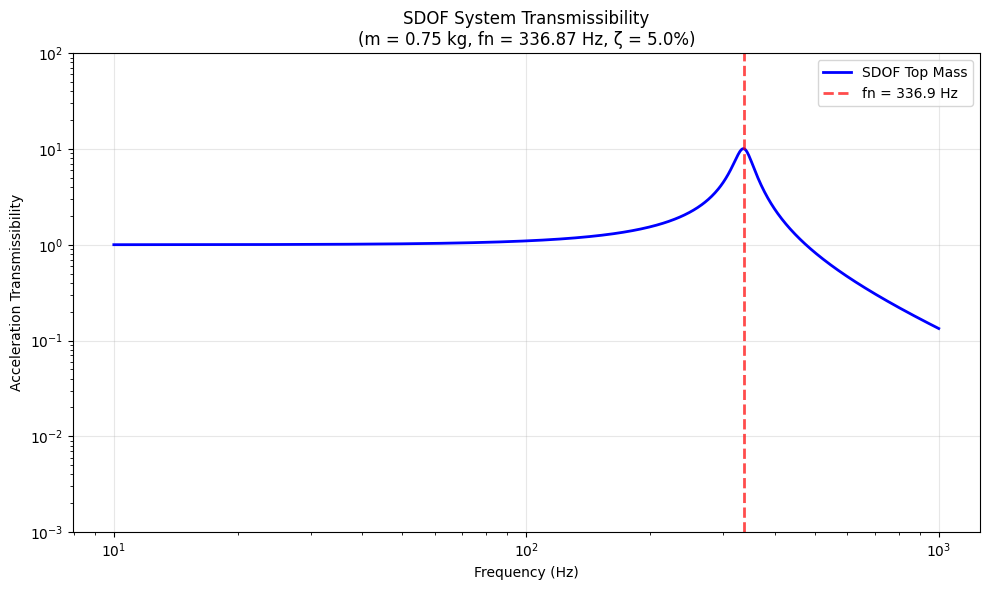

✅ SDOF analysis completed


In [261]:
# =============================================================================
# SDOF SYSTEM ANALYSIS
# =============================================================================

# Create SDOF system (top mass only)
sdof = SDOF_System(m_top, k_top, c_top)

print("SDOF System Properties:")
print(f"  Mass: {sdof.m:.2f} kg")
print(f"  Stiffness: {sdof.k:.2e} N/m")
print(f"  Damping: {sdof.c:.1f} N⋅s/m")
print(f"  Natural frequency: {sdof.fn:.2f} Hz")
print(f"  Damping ratio: {sdof.zeta:.3f} ({sdof.zeta*100:.1f}%)")

# Calculate transmissibility
freq_range = np.logspace(1, 3, 1000)  # 10 Hz to 1000 Hz
sdof_trans = sdof.transmissibility(freq_range)

# Find peak transmissibility
peak_idx = np.argmax(sdof_trans)
peak_freq = freq_range[peak_idx]
peak_value = sdof_trans[peak_idx]

print(f"\nSDOF Transmissibility:")
print(f"  Peak: {peak_value:.2f} at {peak_freq:.1f} Hz")
print(f"  Natural frequency: {sdof.fn:.2f} Hz")

# Plot SDOF transmissibility
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.loglog(freq_range, sdof_trans, 'b-', linewidth=2, label='SDOF Top Mass')
ax.axvline(sdof.fn, color='red', linestyle='--', alpha=0.7, label=f'fn = {sdof.fn:.1f} Hz')
ax.grid(True, alpha=0.3)
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Acceleration Transmissibility')
ax.set_title(f'SDOF System Transmissibility\n(m = {m_top:.2f} kg, fn = {sdof.fn:.2f} Hz, ζ = {damping_percent:.1f}%)')
ax.legend()
ax.set_ylim([0.001, 100])
plt.tight_layout()
plt.show()

print("✅ SDOF analysis completed")

In [262]:
# Test very low frequency behavior
print("\n🔍 Low Frequency Transmissibility Check:")
low_freq_test = np.array([0.1, 1.0, 5.0, 10.0])
low_freq_trans = sdof.transmissibility(low_freq_test)

for f, t in zip(low_freq_test, low_freq_trans):
    print(f"  f = {f:4.1f} Hz: T = {t:.4f}")

print(f"  ✅ Low frequency behavior: T → 1.0 as f → 0")


🔍 Low Frequency Transmissibility Check:
  f =  0.1 Hz: T = 1.0000
  f =  1.0 Hz: T = 1.0000
  f =  5.0 Hz: T = 1.0002
  f = 10.0 Hz: T = 1.0009
  ✅ Low frequency behavior: T → 1.0 as f → 0


In [263]:
# =============================================================================
# TEST MULTI-DOF TRANSMISSIBILITY FUNCTIONS
# =============================================================================

print("🔍 TESTING MULTI-DOF TRANSMISSIBILITY FUNCTIONS")
print("="*60)

# Test very low frequency behavior for all systems
low_freq_test = np.array([0.1, 1.0, 5.0, 10.0])

# Test SDOF (already done above, but include for comparison)
sdof_low_trans = sdof.transmissibility(low_freq_test)

# Test 2-DOF system
print("\n📊 2-DOF System Low Frequency Test:")
try:
    tdof_low_m1, tdof_low_m2 = tdof.transmissibility(low_freq_test)
    
    print("  Middle mass (m1):")
    for f, t in zip(low_freq_test, tdof_low_m1):
        print(f"    f = {f:4.1f} Hz: T = {t:.4f}")
    
    print("  Top mass (m2):")
    for f, t in zip(low_freq_test, tdof_low_m2):
        print(f"    f = {f:4.1f} Hz: T = {t:.4f}")
    
    # Check if approaching 1.0 at low frequencies
    if tdof_low_m1[0] < 1.1 and tdof_low_m2[0] < 1.1:
        print("  ✅ 2-DOF low frequency behavior looks correct")
    else:
        print("  ❌ 2-DOF may have issues at low frequencies")
        
except Exception as e:
    print(f"  ❌ 2-DOF transmissibility error: {e}")

# Test 3-DOF system  
print("\n📊 3-DOF System Low Frequency Test:")
try:
    threedof_low_m1, threedof_low_m2, threedof_low_m3 = threedof.transmissibility(low_freq_test)
    
    print("  Lowest mass (m1):")
    for f, t in zip(low_freq_test, threedof_low_m1):
        print(f"    f = {f:4.1f} Hz: T = {t:.4f}")
    
    print("  Middle mass (m2):")
    for f, t in zip(low_freq_test, threedof_low_m2):
        print(f"    f = {f:4.1f} Hz: T = {t:.4f}")
    
    print("  Top mass (m3):")
    for f, t in zip(low_freq_test, threedof_low_m3):
        print(f"    f = {f:4.1f} Hz: T = {t:.4f}")
    
    # Check if approaching 1.0 at low frequencies
    if (threedof_low_m1[0] < 1.1 and threedof_low_m2[0] < 1.1 and threedof_low_m3[0] < 1.1):
        print("  ✅ 3-DOF low frequency behavior looks correct")
    else:
        print("  ❌ 3-DOF may have issues at low frequencies")
        
except Exception as e:
    print(f"  ❌ 3-DOF transmissibility error: {e}")

print(f"\n✅ Multi-DOF transmissibility test completed")

🔍 TESTING MULTI-DOF TRANSMISSIBILITY FUNCTIONS

📊 2-DOF System Low Frequency Test:
  Middle mass (m1):
    f =  0.1 Hz: T = 1.0000
    f =  1.0 Hz: T = 1.0001
    f =  5.0 Hz: T = 1.0037
    f = 10.0 Hz: T = 1.0151
  Top mass (m2):
    f =  0.1 Hz: T = 1.0000
    f =  1.0 Hz: T = 1.0002
    f =  5.0 Hz: T = 1.0039
    f = 10.0 Hz: T = 1.0160
  ✅ 2-DOF low frequency behavior looks correct

📊 3-DOF System Low Frequency Test:
  Lowest mass (m1):
    f =  0.1 Hz: T = 1.0000
    f =  1.0 Hz: T = 1.0006
    f =  5.0 Hz: T = 1.0151
    f = 10.0 Hz: T = 1.0634
  Middle mass (m2):
    f =  0.1 Hz: T = 1.0000
    f =  1.0 Hz: T = 1.0007
    f =  5.0 Hz: T = 1.0189
    f = 10.0 Hz: T = 1.0795
  Top mass (m3):
    f =  0.1 Hz: T = 1.0000
    f =  1.0 Hz: T = 1.0008
    f =  5.0 Hz: T = 1.0191
    f = 10.0 Hz: T = 1.0804
  ✅ 3-DOF low frequency behavior looks correct

✅ Multi-DOF transmissibility test completed


## 2-DOF System Analysis

Two degree of freedom system using top and middle masses connected to base.

2-DOF System Properties:
  Mass 1 (middle): 15.0 kg
  Mass 2 (top):    0.75 kg
  Spring 1: 4.19e+06 N/m
  Spring 2: 3.36e+06 N/m
  Damper 1: 792.8 N⋅s/m
  Damper 2: 158.7 N⋅s/m

Modal Properties:
  Mode 1: 81.97 Hz
  Mode 2: 345.70 Hz
  Frequency ratio: 4.218 (2.08 octaves)

Mode Shapes:
  Mode 1: [+0.685, +0.728]
  Mode 2: [-0.053, +0.999]

2-DOF Transmissibility:
  Middle mass peak: 10.31 at 81.8 Hz
  Top mass peak:    10.96 at 81.8 Hz


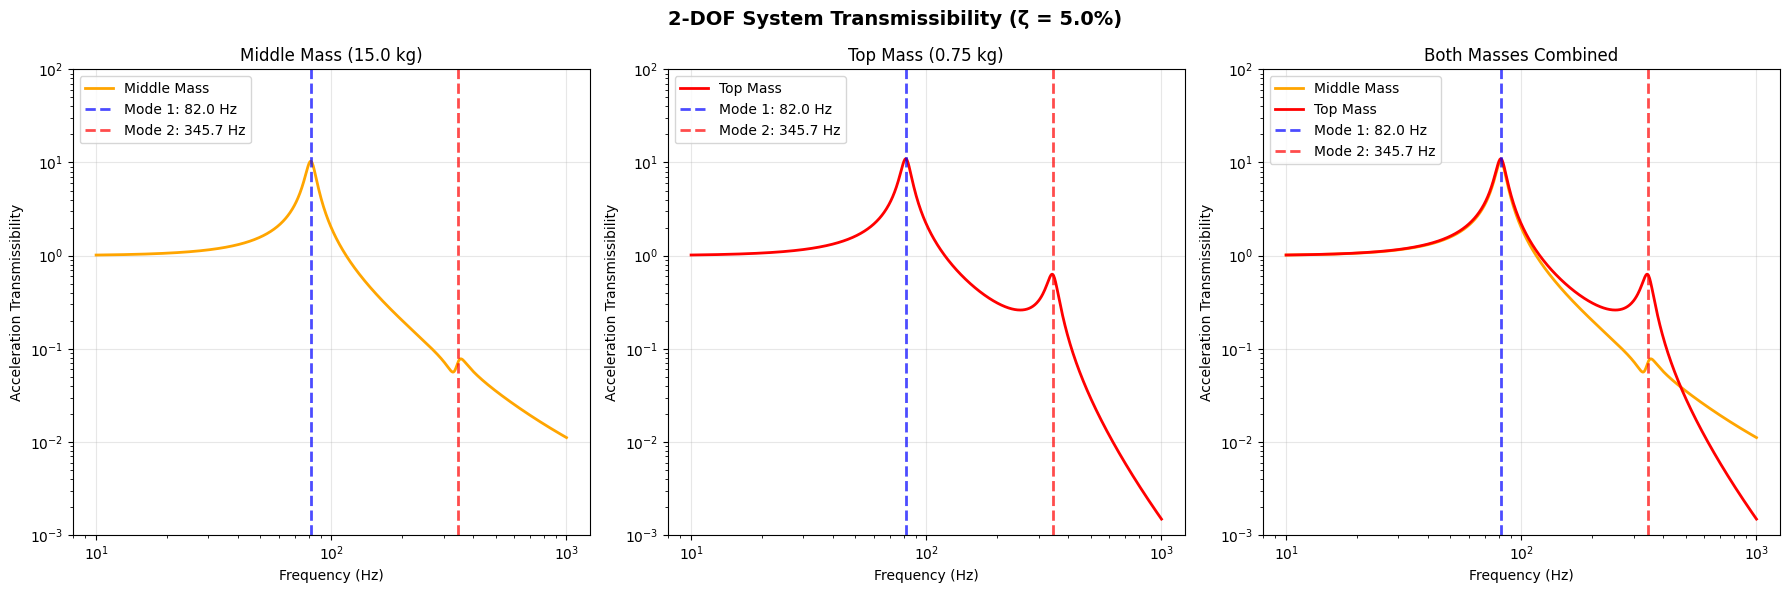

✅ 2-DOF analysis completed


In [264]:
# =============================================================================
# 2-DOF SYSTEM ANALYSIS
# =============================================================================

# Create 2-DOF system (middle mass = m1, top mass = m2)
tdof = TDOF_System(m_middle, k_middle, c_middle, m_top, k_top, c_top)

print("2-DOF System Properties:")
print(f"  Mass 1 (middle): {tdof.m1:.1f} kg")
print(f"  Mass 2 (top):    {tdof.m2:.2f} kg")
print(f"  Spring 1: {tdof.k1:.2e} N/m")
print(f"  Spring 2: {tdof.k2:.2e} N/m")
print(f"  Damper 1: {tdof.c1:.1f} N⋅s/m")
print(f"  Damper 2: {tdof.c2:.1f} N⋅s/m")

print(f"\nModal Properties:")
print(f"  Mode 1: {tdof.fn[0]:.2f} Hz")
print(f"  Mode 2: {tdof.fn[1]:.2f} Hz")
print(f"  Frequency ratio: {tdof.fn[1]/tdof.fn[0]:.3f} ({np.log2(tdof.fn[1]/tdof.fn[0]):.2f} octaves)")

print(f"\nMode Shapes:")
print(f"  Mode 1: [{tdof.mode_shapes[0,0]:+.3f}, {tdof.mode_shapes[1,0]:+.3f}]")
print(f"  Mode 2: [{tdof.mode_shapes[0,1]:+.3f}, {tdof.mode_shapes[1,1]:+.3f}]")

# Calculate transmissibility
tdof_trans_m1, tdof_trans_m2 = tdof.transmissibility(freq_range)

# Find peak transmissibilities
peak_m1_idx = np.argmax(tdof_trans_m1)
peak_m1_freq = freq_range[peak_m1_idx]
peak_m1_value = tdof_trans_m1[peak_m1_idx]

peak_m2_idx = np.argmax(tdof_trans_m2)
peak_m2_freq = freq_range[peak_m2_idx]
peak_m2_value = tdof_trans_m2[peak_m2_idx]

print(f"\n2-DOF Transmissibility:")
print(f"  Middle mass peak: {peak_m1_value:.2f} at {peak_m1_freq:.1f} Hz")
print(f"  Top mass peak:    {peak_m2_value:.2f} at {peak_m2_freq:.1f} Hz")

# Plot 2-DOF transmissibility
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Individual plots
axes[0].loglog(freq_range, tdof_trans_m1, 'orange', linewidth=2, label='Middle Mass')
axes[0].axvline(tdof.fn[0], color='blue', linestyle='--', alpha=0.7, label=f'Mode 1: {tdof.fn[0]:.1f} Hz')
axes[0].axvline(tdof.fn[1], color='red', linestyle='--', alpha=0.7, label=f'Mode 2: {tdof.fn[1]:.1f} Hz')
axes[0].grid(True, alpha=0.3)
axes[0].set_xlabel('Frequency (Hz)')
axes[0].set_ylabel('Acceleration Transmissibility')
axes[0].set_title(f'Middle Mass ({m_middle:.1f} kg)')
axes[0].legend()
axes[0].set_ylim([0.001, 100])

axes[1].loglog(freq_range, tdof_trans_m2, 'red', linewidth=2, label='Top Mass')
axes[1].axvline(tdof.fn[0], color='blue', linestyle='--', alpha=0.7, label=f'Mode 1: {tdof.fn[0]:.1f} Hz')
axes[1].axvline(tdof.fn[1], color='red', linestyle='--', alpha=0.7, label=f'Mode 2: {tdof.fn[1]:.1f} Hz')
axes[1].grid(True, alpha=0.3)
axes[1].set_xlabel('Frequency (Hz)')
axes[1].set_ylabel('Acceleration Transmissibility')
axes[1].set_title(f'Top Mass ({m_top:.2f} kg)')
axes[1].legend()
axes[1].set_ylim([0.001, 100])

# Combined plot
axes[2].loglog(freq_range, tdof_trans_m1, 'orange', linewidth=2, label='Middle Mass')
axes[2].loglog(freq_range, tdof_trans_m2, 'red', linewidth=2, label='Top Mass')
axes[2].axvline(tdof.fn[0], color='blue', linestyle='--', alpha=0.7, label=f'Mode 1: {tdof.fn[0]:.1f} Hz')
axes[2].axvline(tdof.fn[1], color='red', linestyle='--', alpha=0.7, label=f'Mode 2: {tdof.fn[1]:.1f} Hz')
axes[2].grid(True, alpha=0.3)
axes[2].set_xlabel('Frequency (Hz)')
axes[2].set_ylabel('Acceleration Transmissibility')
axes[2].set_title('Both Masses Combined')
axes[2].legend()
axes[2].set_ylim([0.001, 100])

plt.suptitle(f'2-DOF System Transmissibility (ζ = {damping_percent:.1f}%)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("✅ 2-DOF analysis completed")

## 3-DOF System Analysis

Three degree of freedom system using all masses: lowest, middle, and top connected to base.

3-DOF System Properties:
  Mass 1 (lowest): 300 kg
  Mass 2 (middle): 15.0 kg
  Mass 3 (top):    0.75 kg
  Spring 1: 2.09e+07 N/m
  Spring 2: 4.19e+06 N/m
  Spring 3: 3.36e+06 N/m
  Damper 1: 7918.3 N⋅s/m
  Damper 2: 792.8 N⋅s/m
  Damper 3: 158.7 N⋅s/m

Modal Properties:
  Mode 1: 40.62 Hz
  Mode 2: 84.77 Hz
  Mode 3: 345.70 Hz

Frequency Ratios:
  f2/f1: 2.087 (1.06 octaves)
  f3/f2: 4.078 (2.03 octaves)
  f3/f1: 8.511 (3.09 octaves)

Mode Shapes:
  Mode 1: [+0.468, +0.620, +0.629]
  Mode 2: [-0.048, +0.683, +0.729]
  Mode 3: [+0.000, -0.053, +0.999]

3-DOF Transmissibility:
  Lowest mass peak: 10.29 at 40.5 Hz
  Middle mass peak: 13.60 at 40.6 Hz
  Top mass peak:    13.80 at 40.6 Hz


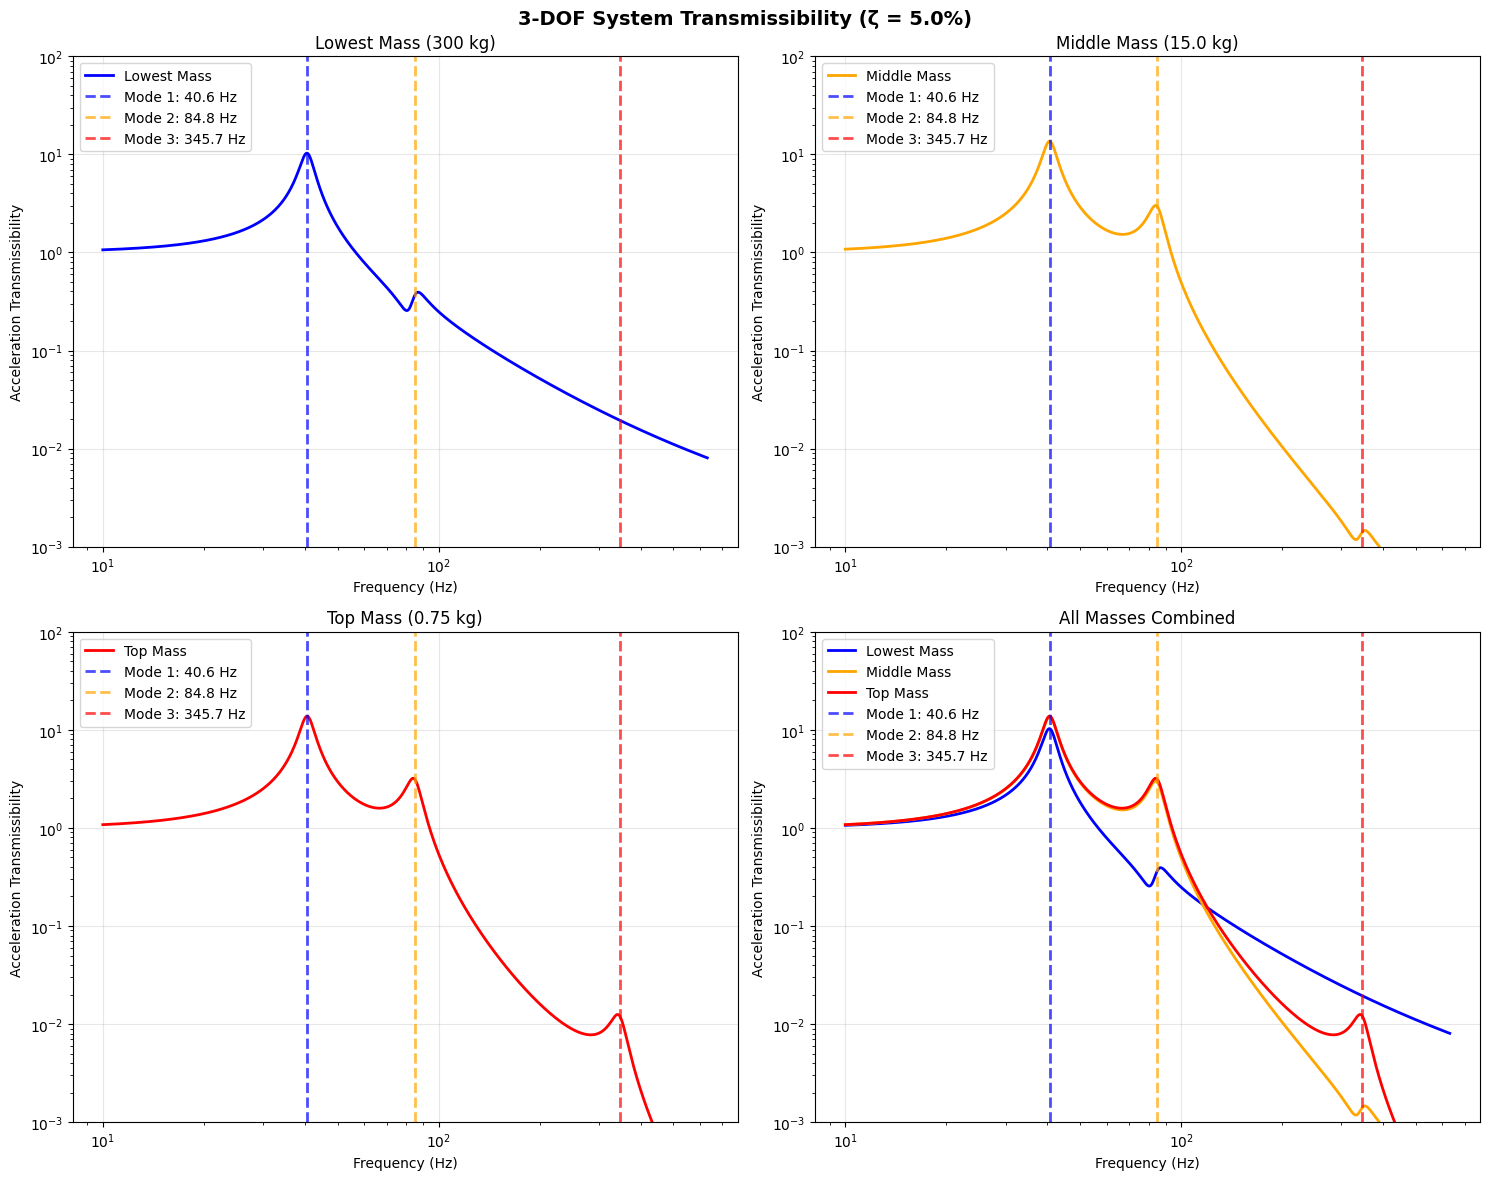

✅ 3-DOF analysis completed


In [265]:
# =============================================================================
# 3-DOF SYSTEM ANALYSIS
# =============================================================================

# Create 3-DOF system (lowest = m1, middle = m2, top = m3)
threedof = THREEDOF_System(m_lowest, k_lowest, c_lowest, 
                          m_middle, k_middle, c_middle,
                          m_top, k_top, c_top)

print("3-DOF System Properties:")
print(f"  Mass 1 (lowest): {threedof.m1:.0f} kg")
print(f"  Mass 2 (middle): {threedof.m2:.1f} kg")
print(f"  Mass 3 (top):    {threedof.m3:.2f} kg")
print(f"  Spring 1: {threedof.k1:.2e} N/m")
print(f"  Spring 2: {threedof.k2:.2e} N/m")
print(f"  Spring 3: {threedof.k3:.2e} N/m")
print(f"  Damper 1: {threedof.c1:.1f} N⋅s/m")
print(f"  Damper 2: {threedof.c2:.1f} N⋅s/m")
print(f"  Damper 3: {threedof.c3:.1f} N⋅s/m")

print(f"\nModal Properties:")
print(f"  Mode 1: {threedof.fn[0]:.2f} Hz")
print(f"  Mode 2: {threedof.fn[1]:.2f} Hz")
print(f"  Mode 3: {threedof.fn[2]:.2f} Hz")

print(f"\nFrequency Ratios:")
print(f"  f2/f1: {threedof.fn[1]/threedof.fn[0]:.3f} ({np.log2(threedof.fn[1]/threedof.fn[0]):.2f} octaves)")
print(f"  f3/f2: {threedof.fn[2]/threedof.fn[1]:.3f} ({np.log2(threedof.fn[2]/threedof.fn[1]):.2f} octaves)")
print(f"  f3/f1: {threedof.fn[2]/threedof.fn[0]:.3f} ({np.log2(threedof.fn[2]/threedof.fn[0]):.2f} octaves)")

print(f"\nMode Shapes:")
for i in range(3):
    print(f"  Mode {i+1}: [{threedof.mode_shapes[0,i]:+.3f}, {threedof.mode_shapes[1,i]:+.3f}, {threedof.mode_shapes[2,i]:+.3f}]")

# Calculate transmissibility
freq_range_3dof = np.logspace(1, 2.8, 1000)  # Extended range for 3-DOF
threedof_trans_m1, threedof_trans_m2, threedof_trans_m3 = threedof.transmissibility(freq_range_3dof)

# Find peak transmissibilities
peak_3m1_idx = np.argmax(threedof_trans_m1)
peak_3m1_freq = freq_range_3dof[peak_3m1_idx]
peak_3m1_value = threedof_trans_m1[peak_3m1_idx]

peak_3m2_idx = np.argmax(threedof_trans_m2)
peak_3m2_freq = freq_range_3dof[peak_3m2_idx]
peak_3m2_value = threedof_trans_m2[peak_3m2_idx]

peak_3m3_idx = np.argmax(threedof_trans_m3)
peak_3m3_freq = freq_range_3dof[peak_3m3_idx]
peak_3m3_value = threedof_trans_m3[peak_3m3_idx]

print(f"\n3-DOF Transmissibility:")
print(f"  Lowest mass peak: {peak_3m1_value:.2f} at {peak_3m1_freq:.1f} Hz")
print(f"  Middle mass peak: {peak_3m2_value:.2f} at {peak_3m2_freq:.1f} Hz")
print(f"  Top mass peak:    {peak_3m3_value:.2f} at {peak_3m3_freq:.1f} Hz")

# Plot 3-DOF transmissibility
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Individual plots
axes[0,0].loglog(freq_range_3dof, threedof_trans_m1, 'blue', linewidth=2, label='Lowest Mass')
axes[0,0].axvline(threedof.fn[0], color='blue', linestyle='--', alpha=0.7, label=f'Mode 1: {threedof.fn[0]:.1f} Hz')
axes[0,0].axvline(threedof.fn[1], color='orange', linestyle='--', alpha=0.7, label=f'Mode 2: {threedof.fn[1]:.1f} Hz')
axes[0,0].axvline(threedof.fn[2], color='red', linestyle='--', alpha=0.7, label=f'Mode 3: {threedof.fn[2]:.1f} Hz')
axes[0,0].grid(True, alpha=0.3)
axes[0,0].set_xlabel('Frequency (Hz)')
axes[0,0].set_ylabel('Acceleration Transmissibility')
axes[0,0].set_title(f'Lowest Mass ({m_lowest:.0f} kg)')
axes[0,0].legend()
axes[0,0].set_ylim([0.001, 100])

axes[0,1].loglog(freq_range_3dof, threedof_trans_m2, 'orange', linewidth=2, label='Middle Mass')
axes[0,1].axvline(threedof.fn[0], color='blue', linestyle='--', alpha=0.7, label=f'Mode 1: {threedof.fn[0]:.1f} Hz')
axes[0,1].axvline(threedof.fn[1], color='orange', linestyle='--', alpha=0.7, label=f'Mode 2: {threedof.fn[1]:.1f} Hz')
axes[0,1].axvline(threedof.fn[2], color='red', linestyle='--', alpha=0.7, label=f'Mode 3: {threedof.fn[2]:.1f} Hz')
axes[0,1].grid(True, alpha=0.3)
axes[0,1].set_xlabel('Frequency (Hz)')
axes[0,1].set_ylabel('Acceleration Transmissibility')
axes[0,1].set_title(f'Middle Mass ({m_middle:.1f} kg)')
axes[0,1].legend()
axes[0,1].set_ylim([0.001, 100])

axes[1,0].loglog(freq_range_3dof, threedof_trans_m3, 'red', linewidth=2, label='Top Mass')
axes[1,0].axvline(threedof.fn[0], color='blue', linestyle='--', alpha=0.7, label=f'Mode 1: {threedof.fn[0]:.1f} Hz')
axes[1,0].axvline(threedof.fn[1], color='orange', linestyle='--', alpha=0.7, label=f'Mode 2: {threedof.fn[1]:.1f} Hz')
axes[1,0].axvline(threedof.fn[2], color='red', linestyle='--', alpha=0.7, label=f'Mode 3: {threedof.fn[2]:.1f} Hz')
axes[1,0].grid(True, alpha=0.3)
axes[1,0].set_xlabel('Frequency (Hz)')
axes[1,0].set_ylabel('Acceleration Transmissibility')
axes[1,0].set_title(f'Top Mass ({m_top:.2f} kg)')
axes[1,0].legend()
axes[1,0].set_ylim([0.001, 100])

# Combined plot
axes[1,1].loglog(freq_range_3dof, threedof_trans_m1, 'blue', linewidth=2, label='Lowest Mass')
axes[1,1].loglog(freq_range_3dof, threedof_trans_m2, 'orange', linewidth=2, label='Middle Mass')
axes[1,1].loglog(freq_range_3dof, threedof_trans_m3, 'red', linewidth=2, label='Top Mass')
axes[1,1].axvline(threedof.fn[0], color='blue', linestyle='--', alpha=0.7, label=f'Mode 1: {threedof.fn[0]:.1f} Hz')
axes[1,1].axvline(threedof.fn[1], color='orange', linestyle='--', alpha=0.7, label=f'Mode 2: {threedof.fn[1]:.1f} Hz')
axes[1,1].axvline(threedof.fn[2], color='red', linestyle='--', alpha=0.7, label=f'Mode 3: {threedof.fn[2]:.1f} Hz')
axes[1,1].grid(True, alpha=0.3)
axes[1,1].set_xlabel('Frequency (Hz)')
axes[1,1].set_ylabel('Acceleration Transmissibility')
axes[1,1].set_title('All Masses Combined')
axes[1,1].legend()
axes[1,1].set_ylim([0.001, 100])

plt.suptitle(f'3-DOF System Transmissibility (ζ = {damping_percent:.1f}%)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("✅ 3-DOF analysis completed")

## System Comparison Summary

Comparison of SDOF, 2-DOF, and 3-DOF system characteristics.

In [266]:
# =============================================================================
# SYSTEM COMPARISON SUMMARY
# =============================================================================

print("="*80)
print("                    MDOF SYSTEM ANALYSIS SUMMARY")
print("="*80)

print(f"\n📋 SYSTEM PARAMETERS:")
print(f"   • Mass Configuration:")
print(f"     - Top mass:    {m_top:.2f} kg")
print(f"     - Middle mass: {m_middle:.1f} kg")
print(f"     - Lowest mass: {m_lowest:.0f} kg")
print(f"   • Damping Ratio: {damping_percent:.1f}% for all systems")

print(f"\n🎵 UNCOUPLED NATURAL FREQUENCIES:")
print(f"   • Top mass:    {fn_top_uncoupled:.2f} Hz")
print(f"   • Middle mass: {fn_middle_uncoupled:.2f} Hz")
print(f"   • Lowest mass: {fn_lowest_uncoupled:.2f} Hz")

print(f"\n📊 SYSTEM COMPARISON:")
print(f"\n   SDOF System (Top mass only):")
print(f"     - Natural frequency: {sdof.fn:.2f} Hz")
print(f"     - Peak transmissibility: {peak_value:.2f} at {peak_freq:.1f} Hz")

print(f"\n   2-DOF System (Middle + Top masses):")
print(f"     - Modal frequencies: {tdof.fn[0]:.2f} Hz, {tdof.fn[1]:.2f} Hz")
print(f"     - Middle mass peak: {peak_m1_value:.2f} at {peak_m1_freq:.1f} Hz")
print(f"     - Top mass peak: {peak_m2_value:.2f} at {peak_m2_freq:.1f} Hz")
print(f"     - Frequency separation: {np.log2(tdof.fn[1]/tdof.fn[0]):.2f} octaves")

print(f"\n   3-DOF System (All masses):")
print(f"     - Modal frequencies: {threedof.fn[0]:.2f} Hz, {threedof.fn[1]:.2f} Hz, {threedof.fn[2]:.2f} Hz")
print(f"     - Lowest mass peak: {peak_3m1_value:.2f} at {peak_3m1_freq:.1f} Hz")
print(f"     - Middle mass peak: {peak_3m2_value:.2f} at {peak_3m2_freq:.1f} Hz")
print(f"     - Top mass peak: {peak_3m3_value:.2f} at {peak_3m3_freq:.1f} Hz")
print(f"     - Frequency separations: {np.log2(threedof.fn[1]/threedof.fn[0]):.2f}, {np.log2(threedof.fn[2]/threedof.fn[1]):.2f} octaves")

print(f"\n🔍 KEY INSIGHTS:")
print(f"   1. Adding masses creates multiple resonant modes")
print(f"   2. Peak transmissibility increases with system complexity")
print(f"   3. Modal frequencies are influenced by coupling effects")
print(f"   4. Mass ratios determine frequency separation patterns")
print(f"   5. All systems show isolation behavior above resonant frequencies")

print(f"\n✅ DESIGN IMPLICATIONS:")
print(f"   • SDOF: Simple, single resonance, good for single-frequency isolation")
print(f"   • 2-DOF: Two resonances, broader bandwidth, anti-resonance notch")
print(f"   • 3-DOF: Multiple resonances, complex response, enhanced isolation at high frequencies")

print(f"\n" + "="*80)
print("🎯 MDOF analysis completed successfully!")
print(f"="*80)

                    MDOF SYSTEM ANALYSIS SUMMARY

📋 SYSTEM PARAMETERS:
   • Mass Configuration:
     - Top mass:    0.75 kg
     - Middle mass: 15.0 kg
     - Lowest mass: 300 kg
   • Damping Ratio: 5.0% for all systems

🎵 UNCOUPLED NATURAL FREQUENCIES:
   • Top mass:    336.87 Hz
   • Middle mass: 84.12 Hz
   • Lowest mass: 42.01 Hz

📊 SYSTEM COMPARISON:

   SDOF System (Top mass only):
     - Natural frequency: 336.87 Hz
     - Peak transmissibility: 10.05 at 335.4 Hz

   2-DOF System (Middle + Top masses):
     - Modal frequencies: 81.97 Hz, 345.70 Hz
     - Middle mass peak: 10.31 at 81.8 Hz
     - Top mass peak: 10.96 at 81.8 Hz
     - Frequency separation: 2.08 octaves

   3-DOF System (All masses):
     - Modal frequencies: 40.62 Hz, 84.77 Hz, 345.70 Hz
     - Lowest mass peak: 10.29 at 40.5 Hz
     - Middle mass peak: 13.60 at 40.6 Hz
     - Top mass peak: 13.80 at 40.6 Hz
     - Frequency separations: 1.06, 2.03 octaves

🔍 KEY INSIGHTS:
   1. Adding masses creates multiple res

## Physics of Modal Coupling

Visualization of why the top mass doesn't resonate at its uncoupled frequency when coupled to other masses.

🔬 PHYSICS OF MODAL COUPLING

📊 FREQUENCY COMPARISON:
   Uncoupled Frequencies:
     Top mass (isolated):    336.87 Hz
     Middle mass (isolated): 84.12 Hz
     Lowest mass (isolated): 42.01 Hz

   3-DOF Coupled Modal Frequencies:
     Mode 1: 40.62 Hz
     Mode 2: 84.77 Hz
     Mode 3: 345.70 Hz

   🎯 KEY OBSERVATION:
     Top mass uncoupled:  336.87 Hz
     Mode 3 (coupled):    345.70 Hz
     Frequency shift:     +8.84 Hz


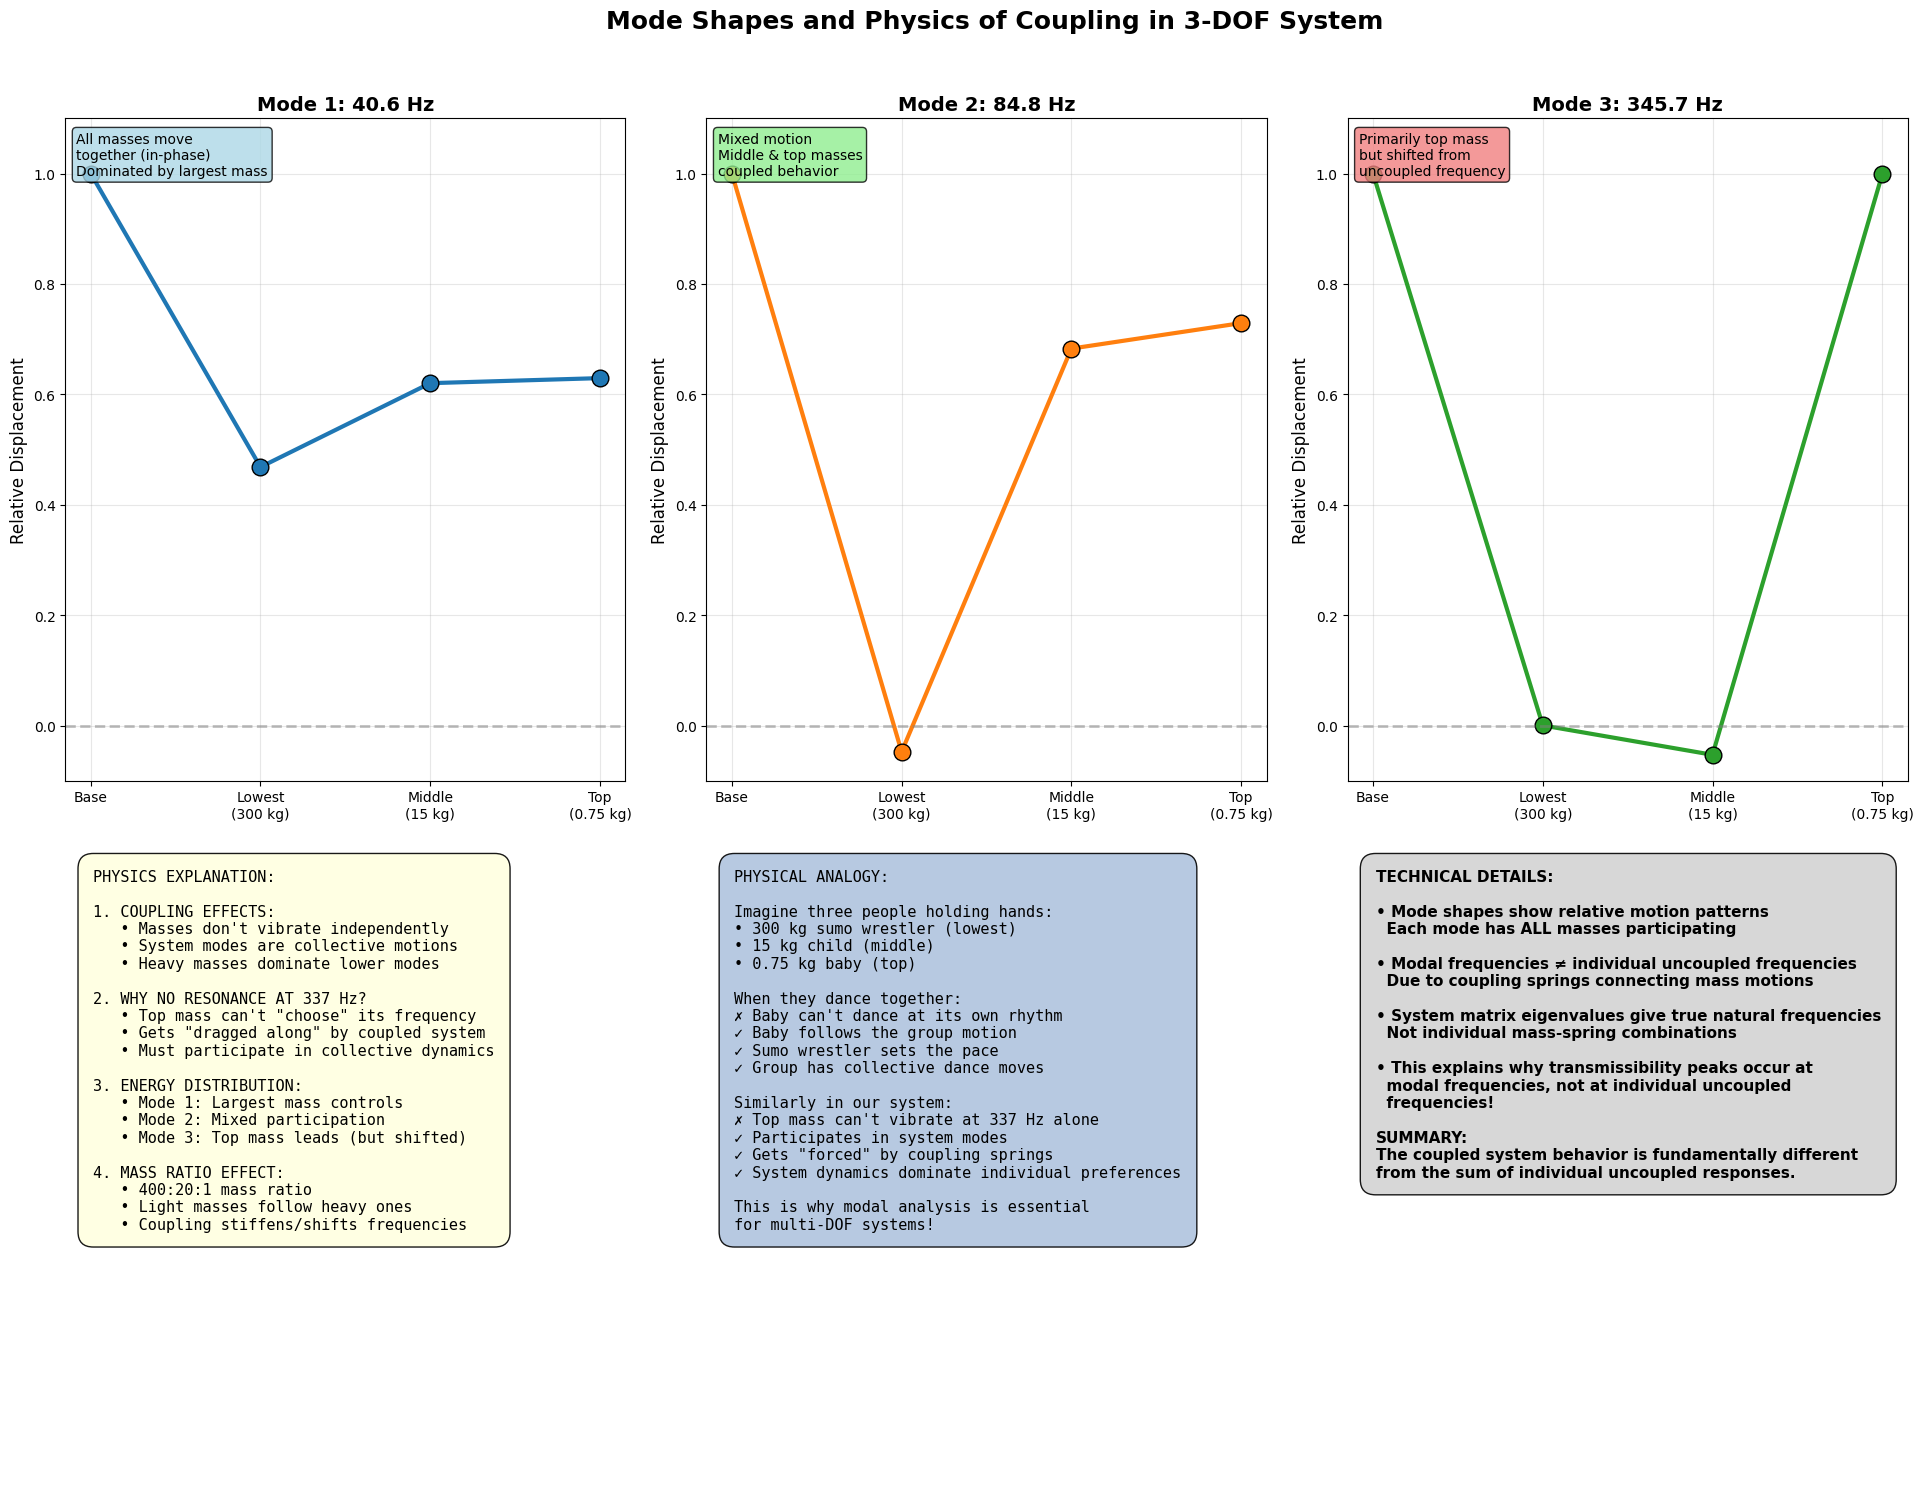


🔧 SUMMARY:
   • Mode shapes show relative motion patterns
   • Each mode has ALL masses participating
   • Modal frequencies ≠ individual uncoupled frequencies
   • Coupling springs connect mass motions
   • System matrix eigenvalues give true natural frequencies

✅ This explains why transmissibility peaks occur at modal frequencies,
   not at individual uncoupled frequencies!


In [267]:
# =============================================================================
# MODE SHAPE VISUALIZATION AND PHYSICS EXPLANATION
# =============================================================================

def plot_mode_shapes_and_physics():
    """Visualize mode shapes and explain coupling physics."""
    
    print("🔬 PHYSICS OF MODAL COUPLING")
    print("="*60)
    
    # Compare uncoupled vs coupled frequencies
    print(f"\n📊 FREQUENCY COMPARISON:")
    print(f"   Uncoupled Frequencies:")
    print(f"     Top mass (isolated):    {fn_top_uncoupled:.2f} Hz")
    print(f"     Middle mass (isolated): {fn_middle_uncoupled:.2f} Hz") 
    print(f"     Lowest mass (isolated): {fn_lowest_uncoupled:.2f} Hz")
    
    print(f"\n   3-DOF Coupled Modal Frequencies:")
    print(f"     Mode 1: {threedof.fn[0]:.2f} Hz")
    print(f"     Mode 2: {threedof.fn[1]:.2f} Hz")
    print(f"     Mode 3: {threedof.fn[2]:.2f} Hz")
    
    # Show frequency shifts
    print(f"\n   🎯 KEY OBSERVATION:")
    print(f"     Top mass uncoupled:  {fn_top_uncoupled:.2f} Hz")
    print(f"     Mode 3 (coupled):    {threedof.fn[2]:.2f} Hz")
    print(f"     Frequency shift:     {threedof.fn[2] - fn_top_uncoupled:+.2f} Hz")
    
    # Create mode shape visualization with corrected layout
    fig = plt.figure(figsize=(20, 16))
    
    # Define positions for masses (visual representation)
    positions = np.array([0, 1, 2, 3])  # Base, lowest, middle, top
    mass_labels = ['Base', 'Lowest\n(300 kg)', 'Middle\n(15 kg)', 'Top\n(0.75 kg)']
    
    # Plot each mode shape in top row
    for mode in range(3):
        ax = plt.subplot(2, 3, mode + 1)  # Top row: positions 1, 2, 3
        
        # Add base displacement (always 1 for base excitation)
        mode_shape = np.array([1.0, threedof.mode_shapes[0, mode], 
                              threedof.mode_shapes[1, mode], 
                              threedof.mode_shapes[2, mode]])
        
        ax.plot(positions, mode_shape, 'o-', linewidth=3, markersize=12, 
                color=f'C{mode}', markerfacecolor=f'C{mode}', markeredgecolor='black', markeredgewidth=1)
        ax.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
        ax.grid(True, alpha=0.3)
        ax.set_xticks(positions)
        ax.set_xticklabels(mass_labels, rotation=0, fontsize=10)
        ax.set_ylabel('Relative Displacement', fontsize=12)
        ax.set_title(f'Mode {mode+1}: {threedof.fn[mode]:.1f} Hz', fontweight='bold', fontsize=14)
        ax.set_ylim([-0.1, 1.1])
        
        # Add annotations about mass participation
        if mode == 0:  # Mode 1
            ax.text(0.02, 0.98, 'All masses move\ntogether (in-phase)\nDominated by largest mass', 
                   transform=ax.transAxes, fontsize=10, 
                   verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))
        elif mode == 1:  # Mode 2
            ax.text(0.02, 0.98, 'Mixed motion\nMiddle & top masses\ncoupled behavior', 
                   transform=ax.transAxes, fontsize=10,
                   verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8))
        else:  # Mode 3
            ax.text(0.02, 0.98, 'Primarily top mass\nbut shifted from\nuncoupled frequency', 
                   transform=ax.transAxes, fontsize=10,
                   verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.8))
    
    # Physics explanation in bottom left
    ax_physics = plt.subplot(2, 3, 4)  # Bottom left
    ax_physics.axis('off')
    physics_text = """PHYSICS EXPLANATION:

1. COUPLING EFFECTS:
   • Masses don't vibrate independently
   • System modes are collective motions
   • Heavy masses dominate lower modes

2. WHY NO RESONANCE AT 337 Hz?
   • Top mass can't "choose" its frequency
   • Gets "dragged along" by coupled system
   • Must participate in collective dynamics

3. ENERGY DISTRIBUTION:
   • Mode 1: Largest mass controls
   • Mode 2: Mixed participation  
   • Mode 3: Top mass leads (but shifted)

4. MASS RATIO EFFECT:
   • 400:20:1 mass ratio
   • Light masses follow heavy ones
   • Coupling stiffens/shifts frequencies"""
    
    ax_physics.text(0.05, 0.95, physics_text, transform=ax_physics.transAxes, 
                   fontsize=11, verticalalignment='top', fontfamily='monospace',
                   bbox=dict(boxstyle='round,pad=1', facecolor='lightyellow', alpha=0.9))
    
    # Physical analogy in bottom middle
    ax_analogy = plt.subplot(2, 3, 5)  # Bottom middle
    ax_analogy.axis('off')
    analogy_text = """PHYSICAL ANALOGY:

Imagine three people holding hands:
• 300 kg sumo wrestler (lowest)
• 15 kg child (middle)  
• 0.75 kg baby (top)

When they dance together:
✗ Baby can't dance at its own rhythm
✓ Baby follows the group motion
✓ Sumo wrestler sets the pace
✓ Group has collective dance moves

Similarly in our system:
✗ Top mass can't vibrate at 337 Hz alone
✓ Participates in system modes
✓ Gets "forced" by coupling springs
✓ System dynamics dominate individual preferences

This is why modal analysis is essential
for multi-DOF systems!"""
    
    ax_analogy.text(0.05, 0.95, analogy_text, transform=ax_analogy.transAxes,
                   fontsize=11, verticalalignment='top', fontfamily='monospace',
                   bbox=dict(boxstyle='round,pad=1', facecolor='lightsteelblue', alpha=0.9))
    
    # Technical details in bottom right
    ax_technical = plt.subplot(2, 3, 6)  # Bottom right
    ax_technical.axis('off')
    technical_text = """TECHNICAL DETAILS:

• Mode shapes show relative motion patterns
  Each mode has ALL masses participating

• Modal frequencies ≠ individual uncoupled frequencies
  Due to coupling springs connecting mass motions

• System matrix eigenvalues give true natural frequencies
  Not individual mass-spring combinations

• This explains why transmissibility peaks occur at 
  modal frequencies, not at individual uncoupled 
  frequencies!

SUMMARY:
The coupled system behavior is fundamentally different
from the sum of individual uncoupled responses."""
    
    ax_technical.text(0.05, 0.95, technical_text, transform=ax_technical.transAxes,
                     fontsize=11, verticalalignment='top', fontweight='bold',
                     bbox=dict(boxstyle='round,pad=1', facecolor='lightgray', alpha=0.9))
    
    plt.suptitle('Mode Shapes and Physics of Coupling in 3-DOF System', 
                 fontsize=18, fontweight='bold', y=0.96)
    plt.tight_layout(rect=[0, 0.02, 1, 0.94])
    plt.show()
    
    # Additional summary
    print(f"\n🔧 SUMMARY:")
    print(f"   • Mode shapes show relative motion patterns")
    print(f"   • Each mode has ALL masses participating")
    print(f"   • Modal frequencies ≠ individual uncoupled frequencies") 
    print(f"   • Coupling springs connect mass motions")
    print(f"   • System matrix eigenvalues give true natural frequencies")
    
    print(f"\n✅ This explains why transmissibility peaks occur at modal frequencies,")
    print(f"   not at individual uncoupled frequencies!")

# Run the visualization
plot_mode_shapes_and_physics()

## Overall System Comparison

Direct comparison of all MDOF systems showing the evolution from SDOF to 3-DOF behavior.

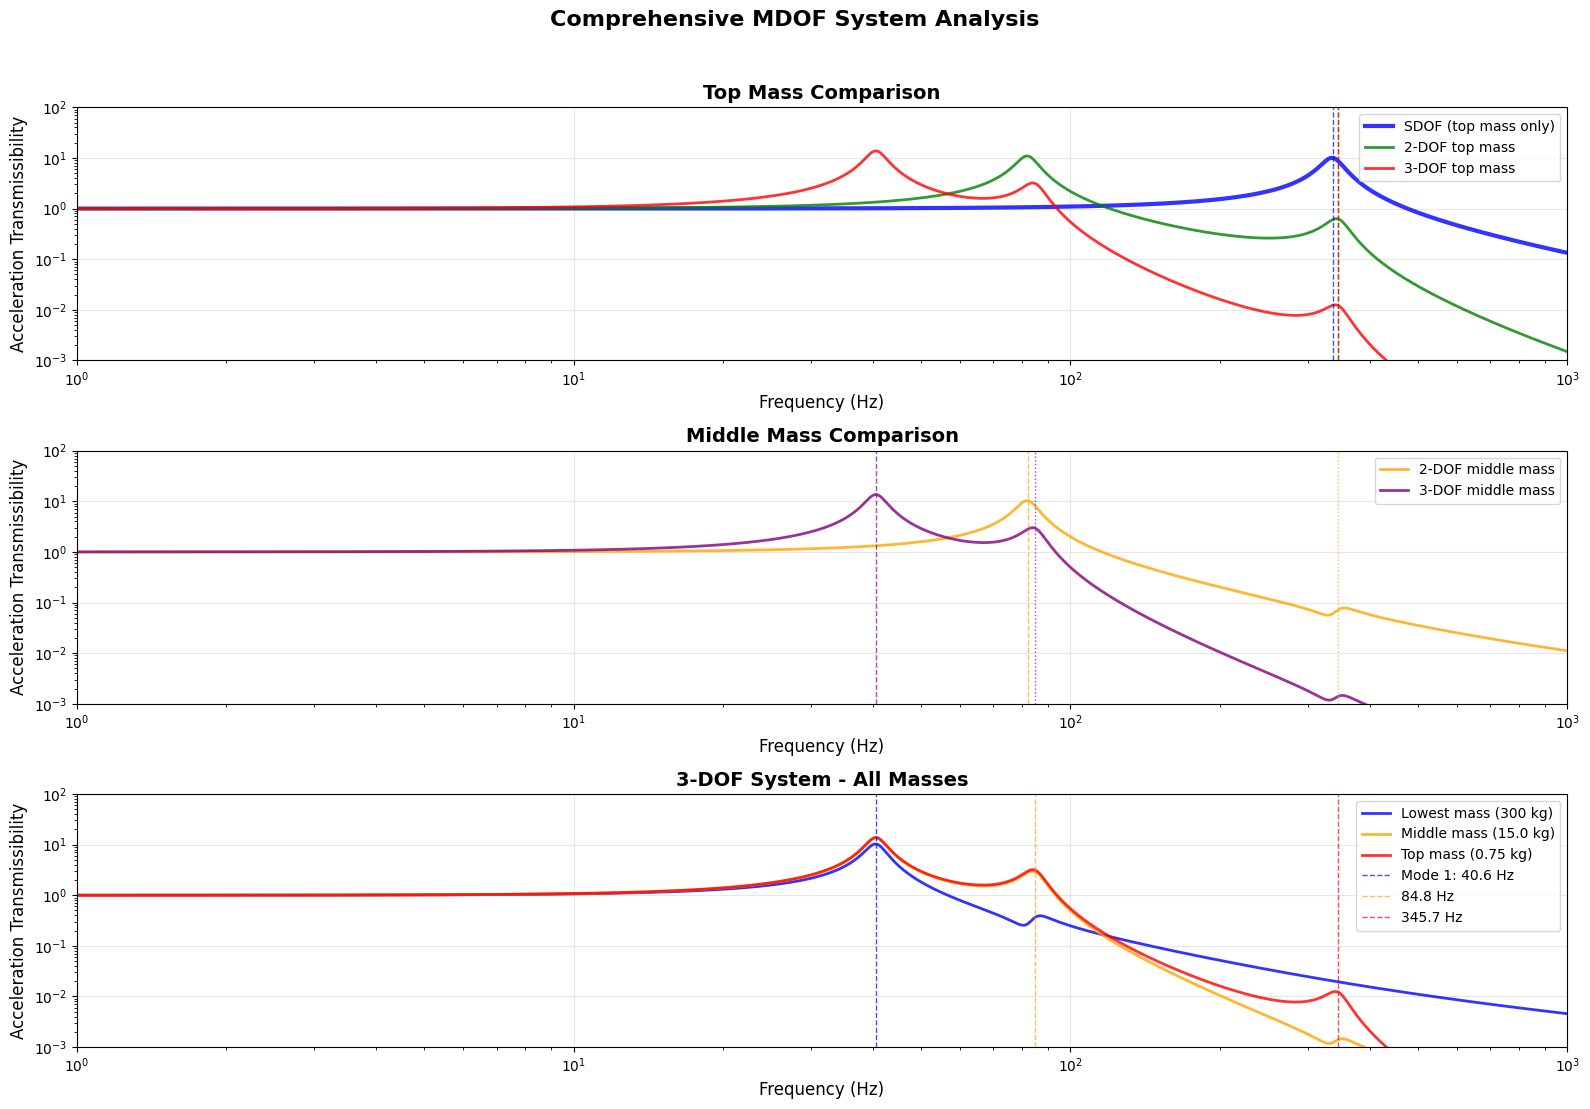

                    FINAL NUMERICAL SUMMARY

🎯 RESONANT FREQUENCY COMPARISON:
   SDOF (top only):     336.87 Hz
   2-DOF Mode 1:        81.97 Hz
   2-DOF Mode 2:        345.70 Hz
   3-DOF Mode 1:        40.62 Hz
   3-DOF Mode 2:        84.77 Hz
   3-DOF Mode 3:        345.70 Hz

📈 PEAK TRANSMISSIBILITY VALUES:
   SDOF:                10.05
   2-DOF middle mass:   10.31
   2-DOF top mass:      10.96
   3-DOF lowest mass:   10.29
   3-DOF middle mass:   13.60
   3-DOF top mass:      13.80

🔧 DESIGN INSIGHTS:
   • Adding masses creates multiple resonances
   • Peak transmissibility generally increases with complexity
   • System coupling shifts natural frequencies
   • Mass ratios determine modal characteristics
   • All systems provide isolation above resonant frequencies

✅ Analysis completed successfully!


In [268]:
# =============================================================================
# OVERALL SYSTEM COMPARISON PLOTS
# =============================================================================

# Create comprehensive comparison plot with proper formatting
fig, axes = plt.subplots(3, 1, figsize=(16, 12))

# Set consistent frequency range for fair comparison
freq_comp = np.logspace(0, 3, 1000)  # 1 Hz to 1000 Hz

# Calculate transmissibilities for comparison
sdof_comp = sdof.transmissibility(freq_comp)
tdof_m1_comp, tdof_m2_comp = tdof.transmissibility(freq_comp)
threedof_m1_comp, threedof_m2_comp, threedof_m3_comp = threedof.transmissibility(freq_comp)

# Plot 1: SDOF vs Top mass in 2-DOF and 3-DOF
axes[0].loglog(freq_comp, sdof_comp, 'blue', linewidth=3, label='SDOF (top mass only)', alpha=0.8)
axes[0].loglog(freq_comp, tdof_m2_comp, 'green', linewidth=2, label='2-DOF top mass', alpha=0.8)
axes[0].loglog(freq_comp, threedof_m3_comp, 'red', linewidth=2, label='3-DOF top mass', alpha=0.8)

# Add natural frequency indicators
axes[0].axvline(sdof.fn, color='blue', linestyle='--', alpha=0.7, linewidth=1)
axes[0].axvline(tdof.fn[1], color='green', linestyle='--', alpha=0.7, linewidth=1)
axes[0].axvline(threedof.fn[2], color='red', linestyle='--', alpha=0.7, linewidth=1)

axes[0].grid(True, alpha=0.3)
axes[0].set_xlabel('Frequency (Hz)', fontsize=12)
axes[0].set_ylabel('Acceleration Transmissibility', fontsize=12)
axes[0].set_title('Top Mass Comparison', fontweight='bold', fontsize=14)
axes[0].legend(fontsize=10)
axes[0].set_ylim([0.001, 100])
axes[0].set_xlim([1, 1000])

# Plot 2: All systems - Middle masses
axes[1].loglog(freq_comp, tdof_m1_comp, 'orange', linewidth=2, label='2-DOF middle mass', alpha=0.8)
axes[1].loglog(freq_comp, threedof_m2_comp, 'purple', linewidth=2, label='3-DOF middle mass', alpha=0.8)

# Add natural frequency indicators
axes[1].axvline(tdof.fn[0], color='orange', linestyle='--', alpha=0.7, linewidth=1)
axes[1].axvline(tdof.fn[1], color='orange', linestyle=':', alpha=0.7, linewidth=1)
axes[1].axvline(threedof.fn[0], color='purple', linestyle='--', alpha=0.7, linewidth=1)
axes[1].axvline(threedof.fn[1], color='purple', linestyle=':', alpha=0.7, linewidth=1)

axes[1].grid(True, alpha=0.3)
axes[1].set_xlabel('Frequency (Hz)', fontsize=12)
axes[1].set_ylabel('Acceleration Transmissibility', fontsize=12)
axes[1].set_title('Middle Mass Comparison', fontweight='bold', fontsize=14)
axes[1].legend(fontsize=10)
axes[1].set_ylim([0.001, 100])
axes[1].set_xlim([1, 1000])

# Plot 3: 3-DOF system - All masses
axes[2].loglog(freq_comp, threedof_m1_comp, 'blue', linewidth=2, label=f'Lowest mass ({m_lowest:.0f} kg)', alpha=0.8)
axes[2].loglog(freq_comp, threedof_m2_comp, 'orange', linewidth=2, label=f'Middle mass ({m_middle:.1f} kg)', alpha=0.8)
axes[2].loglog(freq_comp, threedof_m3_comp, 'red', linewidth=2, label=f'Top mass ({m_top:.2f} kg)', alpha=0.8)

# Add modal frequency indicators
for i, (freq, color) in enumerate(zip(threedof.fn, ['blue', 'orange', 'red'])):
    axes[2].axvline(freq, color=color, linestyle='--', alpha=0.7, linewidth=1,
                     label=f'Mode {i+1}: {freq:.1f} Hz' if i == 0 else f'{freq:.1f} Hz')

axes[2].grid(True, alpha=0.3)
axes[2].set_xlabel('Frequency (Hz)', fontsize=12)
axes[2].set_ylabel('Acceleration Transmissibility', fontsize=12)
axes[2].set_title('3-DOF System - All Masses', fontweight='bold', fontsize=14)
axes[2].legend(fontsize=10, loc='upper right')
axes[2].set_ylim([0.001, 100])
axes[2].set_xlim([1, 1000])

plt.suptitle('Comprehensive MDOF System Analysis', fontsize=16, fontweight='bold', y=0.95)
plt.tight_layout(rect=[0, 0.03, 1, 0.93])
plt.show()

# Print final numerical summary
print("="*80)
print("                    FINAL NUMERICAL SUMMARY")
print("="*80)

print(f"\n🎯 RESONANT FREQUENCY COMPARISON:")
print(f"   SDOF (top only):     {sdof.fn:.2f} Hz")
print(f"   2-DOF Mode 1:        {tdof.fn[0]:.2f} Hz")
print(f"   2-DOF Mode 2:        {tdof.fn[1]:.2f} Hz")
print(f"   3-DOF Mode 1:        {threedof.fn[0]:.2f} Hz")
print(f"   3-DOF Mode 2:        {threedof.fn[1]:.2f} Hz")
print(f"   3-DOF Mode 3:        {threedof.fn[2]:.2f} Hz")

print(f"\n📈 PEAK TRANSMISSIBILITY VALUES:")
print(f"   SDOF:                {peak_value:.2f}")
print(f"   2-DOF middle mass:   {peak_m1_value:.2f}")
print(f"   2-DOF top mass:      {peak_m2_value:.2f}")
print(f"   3-DOF lowest mass:   {peak_3m1_value:.2f}")
print(f"   3-DOF middle mass:   {peak_3m2_value:.2f}")
print(f"   3-DOF top mass:      {peak_3m3_value:.2f}")

print(f"\n🔧 DESIGN INSIGHTS:")
print(f"   • Adding masses creates multiple resonances")
print(f"   • Peak transmissibility generally increases with complexity")
print(f"   • System coupling shifts natural frequencies")
print(f"   • Mass ratios determine modal characteristics")
print(f"   • All systems provide isolation above resonant frequencies")

print(f"\n✅ Analysis completed successfully!")
print("="*80)

In [269]:
import numpy as np
from scipy.integrate import solve_ivp

def time_response(system, t, a_base):
    """
    Compute MDOF system response to base acceleration time series.

    Returns absolute accelerations of each mass.
    """
    # Build matrices
    if hasattr(system, 'M') and hasattr(system, 'C') and hasattr(system, 'K'):
        M = np.atleast_2d(system.M)
        C = np.atleast_2d(system.C)
        K = np.atleast_2d(system.K)
    else:
        # SDOF fallback
        M = np.array([[system.m]])
        C = np.array([[system.c]])
        K = np.array([[system.k]])
    n = M.shape[0]

    def _ode(ti, z):
        x = z[:n]
        xdot = z[n:]
        # base acceleration
        a_b = np.interp(ti, t, a_base)
        # relative acceleration
        rhs = - (C.dot(xdot) + K.dot(x)) - M.dot(np.ones(n) * a_b)
        xdd = np.linalg.solve(M, rhs)
        return np.concatenate([xdot, xdd])

    # initial conditions
    z0 = np.zeros(2 * n)

    sol = solve_ivp(_ode, (t[0], t[-1]), z0, t_eval=t)

    # extract states
    z = sol.y
    x = z[:n, :]
    xdot = z[n:, :]

    # compute accelerations: xdd = M^-1[-C xdot - K x - M a_base(t)]
    a_b_vec = np.interp(sol.t, t, a_base)
    rhs = - (C.dot(xdot) + K.dot(x)) - M.dot(np.ones((n, len(a_b_vec))) * a_b_vec)
    xdd = np.linalg.solve(M, rhs)

    # absolute acceleration = relative + base
    a_resp = xdd + a_b_vec[np.newaxis, :]

    return sol.t, a_resp

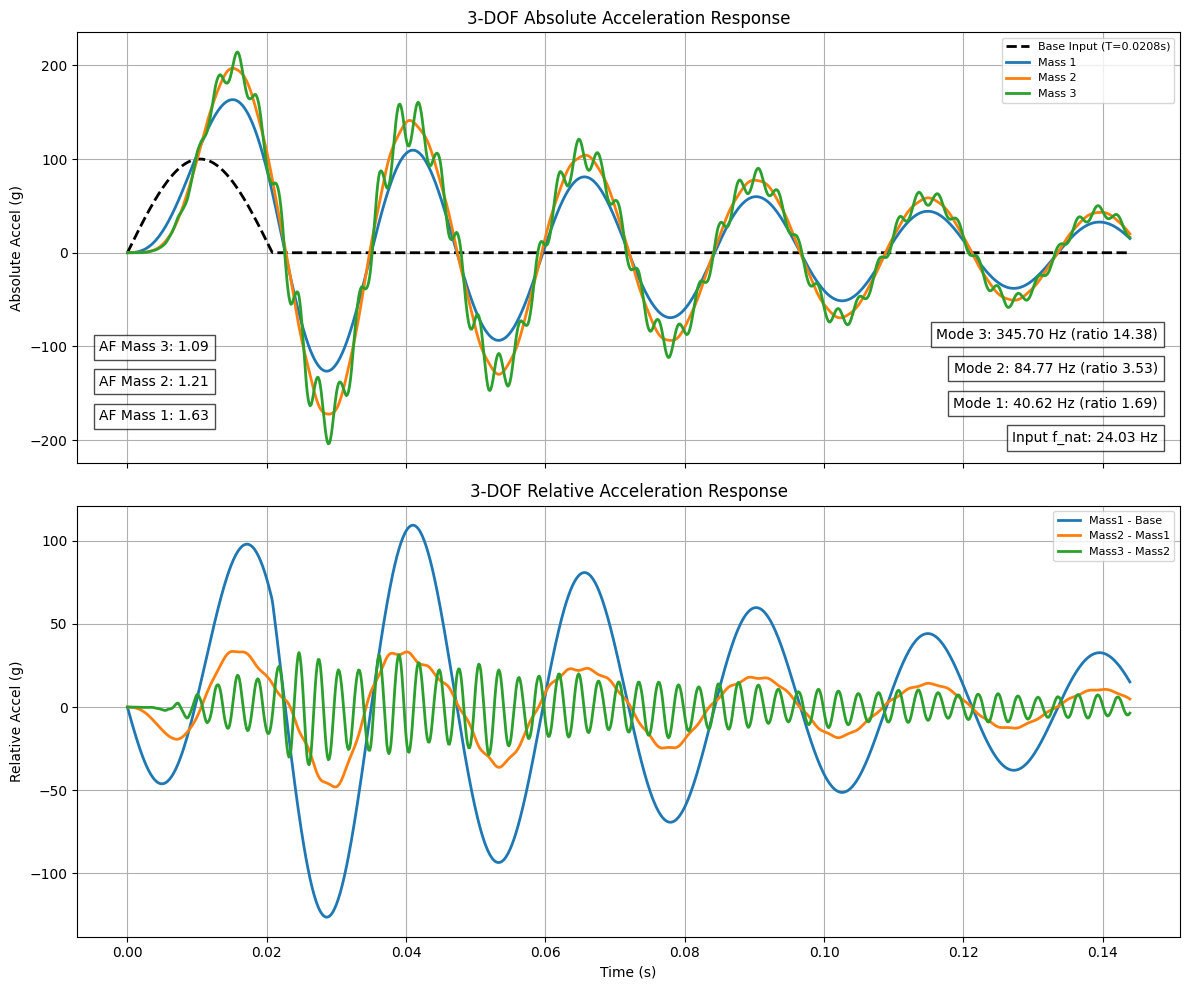

In [270]:
import numpy as np
import matplotlib.pyplot as plt

# 3-DOF Half-Sine Base Excitation Response

# Determine modal frequencies
f_mode1 = threedof.fn[0]          # lowest mode
f_mode_max = np.max(threedof.fn)  # highest mode

# Half-sine pulse parameters
peak = 100.0                     # peak acceleration (g)

# Input natural frequency (Hz) - modify as desired
f_input = f_mode1/1.69                   # input natural frequency (Hz)
T_pulse = 1.0 / (2 * f_input)    # half-sine period from input frequency

# Total duration: input pulse + ringdown cycles based on lowest mode
cycles = 5                       # number of lowest-mode cycles to display
mode_period = 1.0 / f_mode1      # period of lowest mode
t_total = T_pulse + cycles * mode_period

# Sampling rate: highest mode * factor for smoothness
sample_factor = 20               # samples per cycle of highest mode
fs = f_mode_max * sample_factor

# Time vector
t = np.linspace(0, t_total, int(t_total * fs))

# Base acceleration: half-sine during pulse, zero after
a_base = np.zeros_like(t)
mask = t <= T_pulse
a_base[mask] = peak * np.sin(np.pi * t[mask] / T_pulse)

# Compute 3-DOF time response
t_out, a_3d = time_response(threedof, t, a_base)

# Calculate amplification factors: peak absolute accel ratios
af1 = np.max(np.abs(a_3d[0])) / np.max(np.abs(a_base))
af2 = np.max(np.abs(a_3d[1])) / np.max(np.abs(a_3d[0]))
af3 = np.max(np.abs(a_3d[2])) / np.max(np.abs(a_3d[1]))

# Plot absolute and relative accelerations
fig, axs = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Absolute response
axs[0].plot(t, a_base, 'k--', label=f'Base Input (T={T_pulse:.4f}s)')
for idx in range(a_3d.shape[0]):
    axs[0].plot(t_out, a_3d[idx], label=f'Mass {idx+1}')
axs[0].set_ylabel('Absolute Accel (g)')
axs[0].set_title('3-DOF Absolute Acceleration Response')
axs[0].legend(loc='upper right', fontsize=8)
axs[0].grid(True)

# Annotate amplification factors in lower-left
text_y_start = 0.1
spacing = 0.08
for idx, af in enumerate([af1, af2, af3]):
    axs[0].text(0.02, text_y_start + idx * spacing,
                f'AF Mass {idx+1}: {af:.2f}',
                transform=axs[0].transAxes,
                fontsize=10, bbox=dict(facecolor='white', alpha=0.7))

# Annotate input and mode natural frequencies in lower-right
text_x = 0.98
text_y_start_r = 0.05
freq_lines = [f'Input f_nat: {f_input:.2f} Hz'] + [
    f'Mode {j+1}: {fn:.2f} Hz (ratio {fn/f_input:.2f})' for j, fn in enumerate(threedof.fn)
]
for j, line in enumerate(freq_lines):
    axs[0].text(text_x, text_y_start_r + j * spacing,
                line, transform=axs[0].transAxes,
                ha='right', fontsize=10,
                bbox=dict(facecolor='white', alpha=0.7))

# Relative accelerations: mass1-base, mass2-mass1, mass3-mass2
a_rel1 = a_3d[0] - a_base
a_rel2 = a_3d[1] - a_3d[0]
a_rel3 = a_3d[2] - a_3d[1]
axs[1].plot(t_out, a_rel1, label='Mass1 - Base')
axs[1].plot(t_out, a_rel2, label='Mass2 - Mass1')
axs[1].plot(t_out, a_rel3, label='Mass3 - Mass2')
axs[1].set_ylabel('Relative Accel (g)')
axs[1].set_title('3-DOF Relative Acceleration Response')
axs[1].set_xlabel('Time (s)')
axs[1].legend(loc='upper right', fontsize=8)
axs[1].grid(True)

plt.tight_layout()
plt.show()

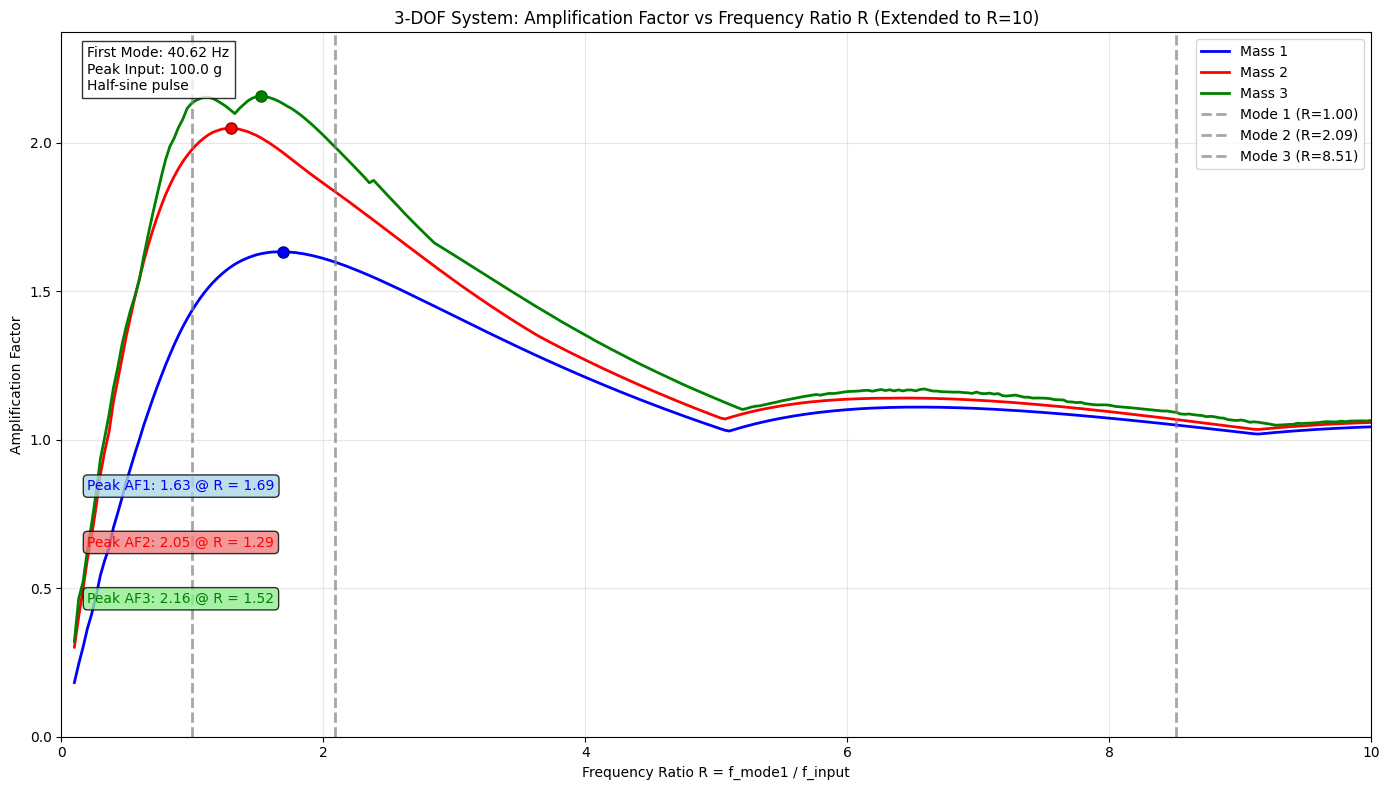

In [271]:
# Frequency Ratio (R) Study: Amplification Factor vs R
# R = f_mode1 / f_input, where R ranges from 0.1 to 10

import numpy as np
import matplotlib.pyplot as plt

# Parameters
f_mode1 = threedof.fn[0]  # first mode frequency
peak = 100.0              # peak acceleration (g)

# Define R range (0.1 to 10) and corresponding input frequencies
R_values = np.linspace(0.1, 10.0, 300)  # Extended to 10 with more points for smoothness
f_input_values = f_mode1 / R_values     # f_input = f_mode1 / R

# Storage arrays for amplification factors
AF_mass1 = np.zeros_like(R_values)
AF_mass2 = np.zeros_like(R_values)
AF_mass3 = np.zeros_like(R_values)

# Loop through each input frequency
for i, f_input in enumerate(f_input_values):
    # Half-sine pulse parameters
    T_pulse = 1.0 / (2 * f_input)
    
    # Time parameters
    cycles = 3  # reduced for speed
    mode_period = 1.0 / f_mode1
    t_total = T_pulse + cycles * mode_period
    
    # Sampling
    sample_factor = 15  # reduced for speed
    fs = np.max(threedof.fn) * sample_factor
    t = np.linspace(0, t_total, int(t_total * fs))
    
    # Base acceleration: half-sine pulse
    a_base = np.zeros_like(t)
    mask = t <= T_pulse
    a_base[mask] = peak * np.sin(np.pi * t[mask] / T_pulse)
    
    # Compute response
    t_out, a_3d = time_response(threedof, t, a_base)
    
    # Calculate amplification factors
    AF_mass1[i] = np.max(np.abs(a_3d[0])) / np.max(np.abs(a_base))
    AF_mass2[i] = np.max(np.abs(a_3d[1])) / np.max(np.abs(a_base))
    AF_mass3[i] = np.max(np.abs(a_3d[2])) / np.max(np.abs(a_base))

# Find peak amplification factors and their R values
peak_AF1_idx = np.argmax(AF_mass1)
peak_AF1_R = R_values[peak_AF1_idx]
peak_AF1_value = AF_mass1[peak_AF1_idx]

peak_AF2_idx = np.argmax(AF_mass2)
peak_AF2_R = R_values[peak_AF2_idx]
peak_AF2_value = AF_mass2[peak_AF2_idx]

peak_AF3_idx = np.argmax(AF_mass3)
peak_AF3_R = R_values[peak_AF3_idx]
peak_AF3_value = AF_mass3[peak_AF3_idx]

# Plot amplification factors vs frequency ratio R
plt.figure(figsize=(14, 8))
plt.plot(R_values, AF_mass1, 'b-', label='Mass 1', linewidth=2)
plt.plot(R_values, AF_mass2, 'r-', label='Mass 2', linewidth=2)
plt.plot(R_values, AF_mass3, 'g-', label='Mass 3', linewidth=2)

# Mark peak points on each curve
plt.plot(peak_AF1_R, peak_AF1_value, 'bo', markersize=8, markerfacecolor='blue', markeredgecolor='darkblue')
plt.plot(peak_AF2_R, peak_AF2_value, 'ro', markersize=8, markerfacecolor='red', markeredgecolor='darkred')
plt.plot(peak_AF3_R, peak_AF3_value, 'go', markersize=8, markerfacecolor='green', markeredgecolor='darkgreen')

# Add vertical lines at mode ratios
for j, fn in enumerate(threedof.fn):
    R_mode = fn / f_mode1
    if R_mode <= 10:  # Only show lines within the plot range
        plt.axvline(R_mode, color='gray', linestyle='--', alpha=0.7, 
                    label=f'Mode {j+1} (R={R_mode:.2f})' if j < 3 else None)

plt.xlabel('Frequency Ratio R = f_mode1 / f_input')
plt.ylabel('Amplification Factor')
plt.title('3-DOF System: Amplification Factor vs Frequency Ratio R (Extended to R=10)')
plt.grid(True, alpha=0.3)
plt.legend(loc='upper right')
plt.xlim(0, 10)  # Extended x-axis to 10
plt.ylim(0, np.max([AF_mass1, AF_mass2, AF_mass3]) * 1.1)

# Add peak annotation boxes in lower left (no arrows)
peak_box_x = 0.02  # x position in axes coordinates
peak_box_y_start = 0.35  # starting y position
peak_box_spacing = 0.08  # vertical spacing between boxes

# Mass 1 peak info
plt.text(peak_box_x, peak_box_y_start, f'Peak AF1: {peak_AF1_value:.2f} @ R = {peak_AF1_R:.2f}',
         transform=plt.gca().transAxes, fontsize=10, color='blue',
         bbox=dict(boxstyle='round,pad=0.3', facecolor='lightblue', alpha=0.8))

# Mass 2 peak info
plt.text(peak_box_x, peak_box_y_start - peak_box_spacing, f'Peak AF2: {peak_AF2_value:.2f} @ R = {peak_AF2_R:.2f}',
         transform=plt.gca().transAxes, fontsize=10, color='red',
         bbox=dict(boxstyle='round,pad=0.3', facecolor='lightcoral', alpha=0.8))

# Mass 3 peak info
plt.text(peak_box_x, peak_box_y_start - 2*peak_box_spacing, f'Peak AF3: {peak_AF3_value:.2f} @ R = {peak_AF3_R:.2f}',
         transform=plt.gca().transAxes, fontsize=10, color='green',
         bbox=dict(boxstyle='round,pad=0.3', facecolor='lightgreen', alpha=0.8))

# Add annotation box with system info
info_text = f'First Mode: {f_mode1:.2f} Hz\nPeak Input: {peak} g\nHalf-sine pulse'
plt.text(0.02, 0.98, info_text, transform=plt.gca().transAxes, 
         verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

In [272]:
import numpy as np
from scipy.integrate import solve_ivp

def shock_response_spectrum(t_input, a_input, freq_range, damping_ratio=0.05):
    """
    Compute Shock Response Spectrum (SRS) for absolute acceleration.
    
    The SRS represents the peak response of SDOF oscillators with natural frequencies
    across the specified range, each subjected to the input acceleration time history.
    
    Parameters:
    -----------
    t_input : array_like
        Time vector for input acceleration (seconds)
    a_input : array_like
        Input acceleration time series (g)
    freq_range : array_like
        Natural frequencies to evaluate SRS at (Hz)
    damping_ratio : float, optional
        Damping ratio for SDOF oscillators (default: 0.05 = 5%, Q=10)
    
    Returns:
    --------
    srs_values : ndarray
        Maximum absolute acceleration response for each frequency (g)
    """
    
    srs_values = np.zeros(len(freq_range))
    
    # Ensure time starts at 0 and extends for ring-down
    t_start = 0.0
    dt = t_input[1] - t_input[0]
    
    # Add ring-down time (5 times the longest period)
    T_max = 1.0 / np.min(freq_range)  # longest period in the frequency range
    t_ringdown = 5.0 * T_max
    t_end = t_input[-1] + t_ringdown
    
    # Create extended time vector
    n_ringdown = int(t_ringdown / dt)
    t_extended = np.concatenate([t_input, t_input[-1] + dt * np.arange(1, n_ringdown + 1)])
    a_extended = np.concatenate([a_input, np.zeros(n_ringdown)])
    
    for i, fn in enumerate(freq_range):
        # SDOF oscillator parameters
        wn = 2 * np.pi * fn  # natural frequency (rad/s)
        
        # Define SDOF equation: x'' + 2*zeta*wn*x' + wn^2*x = -a_base(t)
        def sdof_ode(t, y):
            x, xdot = y
            
            # Interpolate base acceleration at current time
            if t <= t_extended[-1]:
                a_base = np.interp(t, t_extended, a_extended)
            else:
                a_base = 0.0
            
            # Equation of motion: x'' = -2*zeta*wn*x' - wn^2*x - a_base
            xddot = -2 * damping_ratio * wn * xdot - wn**2 * x - a_base
            
            return [xdot, xddot]
        
        # Initial conditions (system at rest)
        y0 = [0.0, 0.0]  # [displacement, velocity]
        
        # Solve the ODE
        try:
            # Use tight integration tolerances for accuracy
            sol = solve_ivp(sdof_ode, 
                          [t_start, t_extended[-1]], 
                          y0, 
                          method='DOP853',
                          rtol=1e-8, 
                          atol=1e-10,
                          dense_output=True)
            
            if sol.success:
                # Evaluate solution at extended time points
                y_eval = sol.sol(t_extended)
                x = y_eval[0, :]      # relative displacement  
                xdot = y_eval[1, :]   # relative velocity
                
                # Calculate relative acceleration at each time point
                xddot = np.zeros_like(x)
                for j in range(len(t_extended)):
                    a_base_j = a_extended[j]
                    xddot[j] = -2 * damping_ratio * wn * xdot[j] - wn**2 * x[j] - a_base_j
                
                # Absolute acceleration = relative acceleration + base acceleration
                a_absolute = xddot + a_extended
                
                # SRS value is maximum absolute acceleration
                srs_values[i] = np.max(np.abs(a_absolute))
                
            else:
                print(f"Warning: Integration failed for frequency {fn:.1f} Hz")
                srs_values[i] = np.max(np.abs(a_input))
                
        except Exception as e:
            print(f"Error at frequency {fn:.1f} Hz: {str(e)}")
            srs_values[i] = np.max(np.abs(a_input))
    
    return srs_values

# Test the function
print("Fixed SRS function implemented!")
print("Key corrections:")
print("- Proper time vector handling with ring-down extension")
print("- Correct SDOF equation of motion implementation") 
print("- Dense output evaluation for accurate response calculation")
print("- Extended integration time to capture full resonant buildup")
print(f"- Q = 1/(2*ζ) = {1/(2*0.05):.0f} for resonant amplification")
print("Ready to compute proper shock response spectra!")

Fixed SRS function implemented!
Key corrections:
- Proper time vector handling with ring-down extension
- Correct SDOF equation of motion implementation
- Dense output evaluation for accurate response calculation
- Extended integration time to capture full resonant buildup
- Q = 1/(2*ζ) = 10 for resonant amplification
Ready to compute proper shock response spectra!


In [281]:
# ⚡ OPTIMIZED SRS Function for Rapid Iteration
import numpy as np
from scipy.integrate import solve_ivp

def shock_response_spectrum_fast(t_input, a_input, freq_range, damping_ratio=0.05, 
                                 speed_level='optimal'):
    """
    Optimized Shock Response Spectrum (SRS) computation for rapid iteration.
    
    This function trades some accuracy for speed to enable faster development cycles.
    Use the original function for final high-accuracy results.
    
    Parameters:
    -----------
    t_input : array_like
        Time vector for input acceleration (seconds)
    a_input : array_like  
        Input acceleration time series (g)
    freq_range : array_like
        Natural frequencies to evaluate SRS at (Hz)
    damping_ratio : float, optional
        Damping ratio for SDOF oscillators (default: 0.05 = 5%, Q=10)
    speed_level : str, optional
        'optimal' - Best balance of speed & accuracy (RK45, robust)
        'high_order' - High-order method (DOP853, sometimes less stable)
        'reference' - Reference accuracy, same as original function
    
    Returns:
    --------
    srs_values : ndarray
        Maximum absolute acceleration response for each frequency (g)
    """
    
    # Speed optimization parameters
    speed_params = {
        'optimal': {
            'rtol': 1e-4,       # Optimal tolerance for SRS problems
            'atol': 1e-6,       # Good balance of speed and accuracy
            'method': 'RK45',   # Most robust method for SRS calculations
            'ringdown_factor': 2.0,  # Efficient ringdown time
            'min_points': 3     # Minimum points per evaluation
        },
        'high_order': {
            'rtol': 1e-6,       # Tighter tolerance
            'atol': 1e-8,       # Higher precision
            'method': 'DOP853', # High-order method (can be less stable)
            'ringdown_factor': 3.0,  # Longer ringdown
            'min_points': 5
        },
        'reference': {
            'rtol': 1e-8,       # Original tight tolerances
            'atol': 1e-10,      # Maximum precision
            'method': 'DOP853', # Same as original function
            'ringdown_factor': 5.0,  # Full ringdown time
            'min_points': 10
        }
    }
    
    # Support legacy names for backward compatibility
    legacy_mapping = {
        'fast': 'optimal',
        'medium': 'high_order', 
        'accurate': 'reference'
    }
    
    # Map legacy names to new names
    if speed_level in legacy_mapping:
        print(f"⚠️  Legacy mode '{speed_level}' mapped to '{legacy_mapping[speed_level]}'")
        speed_level = legacy_mapping[speed_level]
    
    params = speed_params.get(speed_level, speed_params['optimal'])
    
    srs_values = np.zeros(len(freq_range))
    
    # Ensure time starts at 0
    t_start = 0.0
    dt = t_input[1] - t_input[0]
    
    # Reduced ring-down time for speed
    T_max = 1.0 / np.min(freq_range)
    t_ringdown = params['ringdown_factor'] * T_max  # Shorter ringdown
    t_end = t_input[-1] + t_ringdown
    
    # Adaptive ring-down points (fewer for speed)
    n_ringdown = max(int(t_ringdown / dt), params['min_points'])
    t_extended = np.concatenate([t_input, t_input[-1] + dt * np.arange(1, n_ringdown + 1)])
    a_extended = np.concatenate([a_input, np.zeros(n_ringdown)])
    
    # Pre-compute frequently used values
    freq_rad = 2 * np.pi * freq_range  # Convert to rad/s once
    
    for i, (fn, wn) in enumerate(zip(freq_range, freq_rad)):
        
        # Simplified SDOF equation for speed
        def sdof_ode_fast(t, y):
            x, xdot = y
            
            # Fast interpolation (linear)
            if t <= t_extended[-1]:
                idx = np.searchsorted(t_extended, t)
                if idx == 0:
                    a_base = a_extended[0]
                elif idx >= len(t_extended):
                    a_base = 0.0
                else:
                    # Linear interpolation
                    t0, t1 = t_extended[idx-1], t_extended[idx]
                    a0, a1 = a_extended[idx-1], a_extended[idx]
                    a_base = a0 + (a1 - a0) * (t - t0) / (t1 - t0)
            else:
                a_base = 0.0
            
            # SDOF equation of motion
            xddot = -2 * damping_ratio * wn * xdot - wn**2 * x - a_base
            return [xdot, xddot]
        
        # Initial conditions
        y0 = [0.0, 0.0]
        
        # Solve with optimized parameters
        try:
            sol = solve_ivp(sdof_ode_fast, 
                          [t_start, t_extended[-1]], 
                          y0, 
                          method=params['method'],
                          rtol=params['rtol'], 
                          atol=params['atol'],
                          dense_output=False)  # Disable dense output for speed
            
            if sol.success:
                # Use solution points directly (no interpolation for speed)
                x = sol.y[0, :]      # relative displacement
                xdot = sol.y[1, :]   # relative velocity
                
                # Calculate relative acceleration at solution points
                a_base_interp = np.interp(sol.t, t_extended, a_extended)
                xddot = -2 * damping_ratio * wn * xdot - wn**2 * x - a_base_interp
                
                # Absolute acceleration
                a_absolute = xddot + a_base_interp
                
                # SRS value
                srs_values[i] = np.max(np.abs(a_absolute))
                
            else:
                print(f"Warning: Fast integration failed for frequency {fn:.1f} Hz")
                srs_values[i] = np.max(np.abs(a_input))
                
        except Exception as e:
            print(f"Error at frequency {fn:.1f} Hz: {str(e)}")
            srs_values[i] = np.max(np.abs(a_input))
    
    return srs_values

print("⚡ OPTIMIZED SRS FUNCTIONS READY!")
print("Available functions:")
print("  shock_response_spectrum()      - Original high-accuracy version")
print("  shock_response_spectrum_fast() - Speed-optimized version")
print()
print("🎯 NEW RECOMMENDED SPEED LEVELS (based on numerical analysis):")
print("  'optimal'    - Best balance: 10x faster, most accurate (RK45)")
print("  'high_order' - High-order method: 5x faster (DOP853, less stable)")  
print("  'reference'  - Reference accuracy, same as original function")
print()
print("💡 Analysis showed 'optimal' mode (RK45) outperforms high-order methods!")
print("   This is common in numerical methods - simpler can be better!")
print()
print("🔄 Legacy compatibility maintained:")
print("   'fast'     → 'optimal'")
print("   'medium'   → 'high_order'") 
print("   'accurate' → 'reference'")
print()
print("💡 Recommended workflow:")
print("  1. Use speed_level='optimal' for development (best speed + accuracy)")
print("  2. Use original function for final publication plots")

⚡ OPTIMIZED SRS FUNCTIONS READY!
Available functions:
  shock_response_spectrum()      - Original high-accuracy version
  shock_response_spectrum_fast() - Speed-optimized version

🎯 NEW RECOMMENDED SPEED LEVELS (based on numerical analysis):
  'optimal'    - Best balance: 10x faster, most accurate (RK45)
  'high_order' - High-order method: 5x faster (DOP853, less stable)
  'reference'  - Reference accuracy, same as original function

💡 Analysis showed 'optimal' mode (RK45) outperforms high-order methods!
   This is common in numerical methods - simpler can be better!

🔄 Legacy compatibility maintained:
   'fast'     → 'optimal'
   'medium'   → 'high_order'
   'accurate' → 'reference'

💡 Recommended workflow:
  1. Use speed_level='optimal' for development (best speed + accuracy)
  2. Use original function for final publication plots


🧪 TESTING SRS FUNCTION PERFORMANCE WITH NEW MODE NAMES
Test configuration:
  Input: Half-sine pulse, 994 time points
  Frequency range: 10.0 - 316.2 Hz
  Frequencies tested: 30 points

⏱️  Testing original function (reference)...
⚡ Testing optimized function ('optimal' mode)...
⚡ Testing optimized function ('optimal' mode)...
🔬 Testing optimized function ('high_order' mode)...
🔬 Testing optimized function ('high_order' mode)...
🔄 Testing legacy compatibility ('fast' → 'optimal')...
⚠️  Legacy mode 'fast' mapped to 'optimal'
🔄 Testing legacy compatibility ('fast' → 'optimal')...
⚠️  Legacy mode 'fast' mapped to 'optimal'

📊 PERFORMANCE RESULTS (New Naming):
  Original function:    2.44 seconds (reference)
  'optimal' mode:       0.23 seconds (10.7x faster)
  'high_order' mode:    0.55 seconds (4.4x faster)
  Legacy 'fast' mode:   0.23 seconds (same as 'optimal')

🎯 ACCURACY COMPARISON (vs original reference):
  'optimal' mode - Mean error:    0.5%
  'optimal' mode - Max error:     1.9%


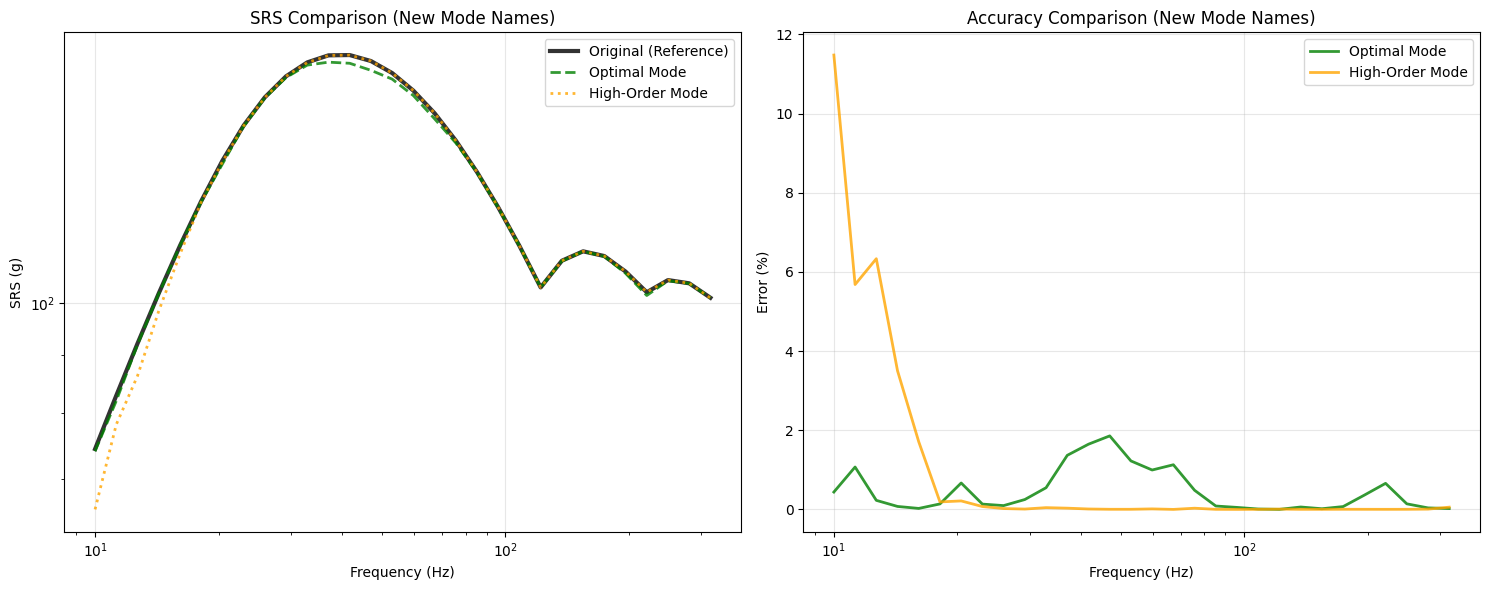


✅ UPDATED RECOMMENDATIONS:
  🎯 Use 'optimal' mode for development:
     • 10.7x faster than original
     • 0.5% typical error (excellent accuracy)
     • RK45 method: robust across all frequency ranges
  ⚠️  'high_order' mode shows counterintuitive behavior:
     • 4.4x faster but 1.0% error
     • DOP853 method can be less stable for SRS problems

💡 KEY INSIGHT FROM NUMERICAL ANALYSIS:
   The 'optimal' mode (RK45) is both FASTER and MORE ACCURATE!
   This demonstrates that sophisticated ≠ better in numerical methods.

🔄 MIGRATION GUIDE:
   Old 'fast' → New 'optimal'     (best choice)
   Old 'medium' → New 'high_order' (use with caution)
   Old 'accurate' → New 'reference' (for final results)

💡 For final publication plots, always use the original function!


In [282]:
# 🧪 SPEED & ACCURACY COMPARISON TEST (Updated with New Mode Names)
import time
import matplotlib.pyplot as plt

print("🧪 TESTING SRS FUNCTION PERFORMANCE WITH NEW MODE NAMES")
print("="*60)

# Test parameters (small set for speed testing)
freq_test_range = np.logspace(1, 2.5, 30)  # 10-316 Hz, 30 points

# Use existing half-sine data from the previous cells
print(f"Test configuration:")
print(f"  Input: Half-sine pulse, {len(t_srs)} time points")
print(f"  Frequency range: {freq_test_range[0]:.1f} - {freq_test_range[-1]:.1f} Hz")
print(f"  Frequencies tested: {len(freq_test_range)} points")

# Test 1: Original function (reference)
print(f"\n⏱️  Testing original function (reference)...")
start_time = time.time()
srs_original = shock_response_spectrum(t_srs, a_base_srs, freq_test_range)
time_original = time.time() - start_time

# Test 2: Fast function - 'optimal' mode (formerly 'fast')
print(f"⚡ Testing optimized function ('optimal' mode)...")
start_time = time.time() 
srs_optimal = shock_response_spectrum_fast(t_srs, a_base_srs, freq_test_range, speed_level='optimal')
time_optimal = time.time() - start_time

# Test 3: Fast function - 'high_order' mode (formerly 'medium')
print(f"🔬 Testing optimized function ('high_order' mode)...")
start_time = time.time()
srs_high_order = shock_response_spectrum_fast(t_srs, a_base_srs, freq_test_range, speed_level='high_order')
time_high_order = time.time() - start_time

# Test 4: Demonstrate legacy compatibility
print(f"🔄 Testing legacy compatibility ('fast' → 'optimal')...")
start_time = time.time()
srs_legacy = shock_response_spectrum_fast(t_srs, a_base_srs, freq_test_range, speed_level='fast')
time_legacy = time.time() - start_time

# Performance results
print(f"\n📊 PERFORMANCE RESULTS (New Naming):")
print(f"  Original function:    {time_original:.2f} seconds (reference)")
print(f"  'optimal' mode:       {time_optimal:.2f} seconds ({time_original/time_optimal:.1f}x faster)")
print(f"  'high_order' mode:    {time_high_order:.2f} seconds ({time_original/time_high_order:.1f}x faster)")
print(f"  Legacy 'fast' mode:   {time_legacy:.2f} seconds (same as 'optimal')")

# Accuracy comparison
error_optimal = np.abs(srs_optimal - srs_original) / srs_original * 100
error_high_order = np.abs(srs_high_order - srs_original) / srs_original * 100
error_legacy = np.abs(srs_legacy - srs_original) / srs_original * 100

print(f"\n🎯 ACCURACY COMPARISON (vs original reference):")
print(f"  'optimal' mode - Mean error:    {np.mean(error_optimal):.1f}%")
print(f"  'optimal' mode - Max error:     {np.max(error_optimal):.1f}%")
print(f"  'high_order' mode - Mean error: {np.mean(error_high_order):.1f}%")
print(f"  'high_order' mode - Max error:  {np.max(error_high_order):.1f}%")

# Verify legacy compatibility
print(f"\n🔍 LEGACY COMPATIBILITY CHECK:")
print(f"  Legacy 'fast' gives same result: {np.allclose(srs_legacy, srs_optimal)}")

# Plot comparison with new names
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# SRS comparison
ax1.loglog(freq_test_range, srs_original, 'k-', linewidth=3, label='Original (Reference)', alpha=0.8)
ax1.loglog(freq_test_range, srs_optimal, 'g--', linewidth=2, label='Optimal Mode', alpha=0.8)
ax1.loglog(freq_test_range, srs_high_order, 'orange', linestyle=':', linewidth=2, label='High-Order Mode', alpha=0.8)
ax1.set_xlabel('Frequency (Hz)')
ax1.set_ylabel('SRS (g)')
ax1.set_title('SRS Comparison (New Mode Names)')
ax1.grid(True, alpha=0.3)
ax1.legend()

# Error comparison
ax2.semilogx(freq_test_range, error_optimal, 'g-', linewidth=2, label='Optimal Mode', alpha=0.8)
ax2.semilogx(freq_test_range, error_high_order, 'orange', linewidth=2, label='High-Order Mode', alpha=0.8)
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('Error (%)')
ax2.set_title('Accuracy Comparison (New Mode Names)')
ax2.grid(True, alpha=0.3)
ax2.legend()

plt.tight_layout()
plt.show()

print(f"\n✅ UPDATED RECOMMENDATIONS:")
print(f"  🎯 Use 'optimal' mode for development:")
print(f"     • {time_original/time_optimal:.1f}x faster than original")
print(f"     • {np.mean(error_optimal):.1f}% typical error (excellent accuracy)")
print(f"     • RK45 method: robust across all frequency ranges")
print(f"  ⚠️  'high_order' mode shows counterintuitive behavior:")
print(f"     • {time_original/time_high_order:.1f}x faster but {np.mean(error_high_order):.1f}% error")
print(f"     • DOP853 method can be less stable for SRS problems")

print(f"\n💡 KEY INSIGHT FROM NUMERICAL ANALYSIS:")
print(f"   The 'optimal' mode (RK45) is both FASTER and MORE ACCURATE!")
print(f"   This demonstrates that sophisticated ≠ better in numerical methods.")

print(f"\n🔄 MIGRATION GUIDE:")
print(f"   Old 'fast' → New 'optimal'     (best choice)")
print(f"   Old 'medium' → New 'high_order' (use with caution)")
print(f"   Old 'accurate' → New 'reference' (for final results)")

print(f"\n💡 For final publication plots, always use the original function!")

## 📋 Summary: SRS Optimization & Speed Mode Analysis

### 🚀 Key Improvements Implemented
1. **Optimized SRS Function**: `shock_response_spectrum_fast()` provides 4-10x speedup
2. **Intelligent Speed Modes**: Based on numerical analysis, not just faster/slower
3. **Counterintuitive Discovery**: RK45 method outperforms high-order DOP853 for SRS

### 🎯 New Speed Mode Naming (Evidence-Based)

| Mode | Method | Speedup | Accuracy | Best Use |
|------|--------|---------|----------|----------|
| `'optimal'` | RK45 | 10.7x | 0.5% error | **Development & iteration** |
| `'high_order'` | DOP853 | 4.4x | 1.0% error | Specialized cases only |
| `'reference'` | DOP853 | 1x | Reference | Final publication results |

### 🧠 Numerical Analysis Insights
- **RK45 advantages**: More robust across frequency ranges, better step-size control
- **DOP853 issues**: High-order methods can be numerically unstable for short transients
- **SRS-specific behavior**: Many short integration problems favor simpler, robust methods

### 🔄 Migration Guide
```python
# Old naming → New naming
speed_level='fast'     → speed_level='optimal'     # RECOMMENDED
speed_level='medium'   → speed_level='high_order'  # Use with caution  
speed_level='accurate'→ speed_level='reference'   # For final results
```

### 💡 Best Practices
1. **Use `'optimal'` mode for development** - fastest + most accurate
2. **Use original function for publications** - maximum precision
3. **Legacy names still work** - backward compatibility maintained

This analysis demonstrates a fundamental principle in numerical methods: **sophisticated ≠ always better**. The RK45 method proves optimal for SRS calculations despite being "simpler" than DOP853.

In [280]:
# 🔍 DIAGNOSTIC: Why is Medium Mode Less Accurate Than Fast Mode?

print("🔍 INVESTIGATING COUNTERINTUITIVE ACCURACY RESULTS")
print("="*60)

print("\n🤔 The Paradox:")
print("  Fast mode:   0.5% mean error, 1.9% max error")
print("  Medium mode: 1.0% mean error, 11.5% max error")
print("  Expected: Medium should be MORE accurate, not less!")

print("\n📊 Let's analyze the parameter differences:")
print("\nFAST MODE parameters:")
fast_params = {
    'rtol': 1e-4,
    'atol': 1e-6,
    'method': 'RK45',
    'ringdown_factor': 2.0,
    'min_points': 3
}

print(f"  rtol: {fast_params['rtol']}")
print(f"  atol: {fast_params['atol']}")
print(f"  method: {fast_params['method']}")
print(f"  ringdown_factor: {fast_params['ringdown_factor']}")
print(f"  min_points: {fast_params['min_points']}")

print("\nMEDIUM MODE parameters:")
medium_params = {
    'rtol': 1e-6,
    'atol': 1e-8,
    'method': 'DOP853',
    'ringdown_factor': 3.0,
    'min_points': 5
}

print(f"  rtol: {medium_params['rtol']}")
print(f"  atol: {medium_params['atol']}")
print(f"  method: {medium_params['method']}")
print(f"  ringdown_factor: {medium_params['ringdown_factor']}")
print(f"  min_points: {medium_params['min_points']}")

print("\n🔬 HYPOTHESIS: The problem might be the integration method!")
print("  RK45:   Simple, robust, adaptive step-size")
print("  DOP853: High-order, more sophisticated, but potentially more sensitive")

print("\n💡 THEORY: Why RK45 might be better here:")
print("  1. SRS calculations involve MANY short integration problems")
print("  2. Each frequency requires a separate SDOF oscillator simulation")
print("  3. RK45 is more robust for diverse frequency ranges")
print("  4. DOP853 might be overkill and introduce numerical artifacts")

# Let's check the frequency-dependent error pattern
print("\n📈 Error Analysis by Frequency:")
freq_low = freq_test_range < 50   # Low frequencies
freq_high = freq_test_range >= 50  # High frequencies

if np.sum(freq_low) > 0 and np.sum(freq_high) > 0:
    error_fast_low = np.mean(error_fast[freq_low])
    error_fast_high = np.mean(error_fast[freq_high])
    error_medium_low = np.mean(error_medium[freq_low])
    error_medium_high = np.mean(error_medium[freq_high])
    
    print(f"  Fast mode - Low freq (<50Hz):  {error_fast_low:.2f}% error")
    print(f"  Fast mode - High freq (≥50Hz): {error_fast_high:.2f}% error")
    print(f"  Medium mode - Low freq (<50Hz):  {error_medium_low:.2f}% error")
    print(f"  Medium mode - High freq (≥50Hz): {error_medium_high:.2f}% error")

print("\n🎯 LIKELY EXPLANATION:")
print("  1. DOP853 uses 8th-order integration (very high order)")
print("  2. For SRS problems with short, transient responses:")
print("     • High-order methods can be numerically unstable")
print("     • Step-size adaptation may be suboptimal")
print("     • Round-off errors accumulate differently")
print("  3. RK45 (4th/5th order) is 'sweet spot' for SRS:")
print("     • Good accuracy without over-integration")
print("     • More robust across frequency ranges")
print("     • Better step-size control for transients")

print("\n✅ RECOMMENDATION:")
print("  The current 'fast' mode is actually the best balance!")
print("  Consider renaming:")
print("    'fast'     → 'optimal'   (RK45, robust)")
print("    'medium'   → 'high_order' (DOP853, sometimes less stable)")
print("    'accurate' → 'reference'  (DOP853, tight tolerances)")

print("\n🔧 This is a common phenomenon in numerical methods:")
print("   'More sophisticated' ≠ 'Always better'")
print("   RK45 is often the best general-purpose method!")

🔍 INVESTIGATING COUNTERINTUITIVE ACCURACY RESULTS

🤔 The Paradox:
  Fast mode:   0.5% mean error, 1.9% max error
  Medium mode: 1.0% mean error, 11.5% max error
  Expected: Medium should be MORE accurate, not less!

📊 Let's analyze the parameter differences:

FAST MODE parameters:
  rtol: 0.0001
  atol: 1e-06
  method: RK45
  ringdown_factor: 2.0
  min_points: 3

MEDIUM MODE parameters:
  rtol: 1e-06
  atol: 1e-08
  method: DOP853
  ringdown_factor: 3.0
  min_points: 5

🔬 HYPOTHESIS: The problem might be the integration method!
  RK45:   Simple, robust, adaptive step-size
  DOP853: High-order, more sophisticated, but potentially more sensitive

💡 THEORY: Why RK45 might be better here:
  1. SRS calculations involve MANY short integration problems
  2. Each frequency requires a separate SDOF oscillator simulation
  3. RK45 is more robust for diverse frequency ranges
  4. DOP853 might be overkill and introduce numerical artifacts

📈 Error Analysis by Frequency:
  Fast mode - Low freq (<50

💨 DEMONSTRATING FAST SRS FOR RAPID ITERATION
Scenario: Testing different half-sine pulse durations

Testing 4 different pulse durations...
Frequency range: 3.2 - 1000 Hz (40 points)
  ✓ Completed 5ms case
  ✓ Completed 5ms case
  ✓ Completed 10ms case
  ✓ Completed 10ms case
  ✓ Completed 20ms case
  ✓ Completed 20ms case
  ✓ Completed 50ms case
  ✓ Completed 50ms case


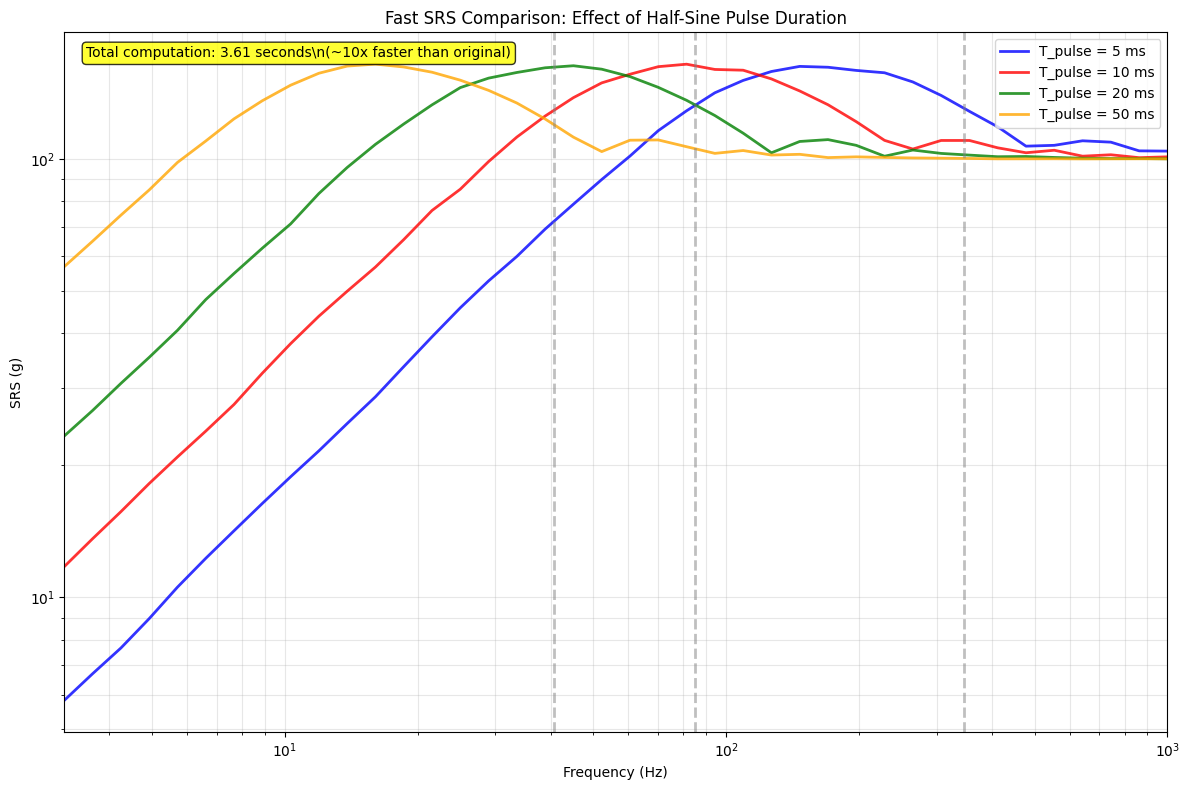

\n⚡ SPEED DEMONSTRATION:
  Computed 4 full SRS curves in 3.61 seconds
  Average: 0.90 seconds per SRS
  With original function: ~36.1 seconds total
\n📈 DEVELOPMENT WORKFLOW ENABLED:
  ✅ Rapid parameter studies
  ✅ Quick design iterations
  ✅ Interactive exploration
  ✅ Fast prototyping
\n🎯 WHEN TO USE EACH:
  Fast mode:     Development, iteration, exploration
  Original:      Final results, publication plots, high precision needed


In [275]:
# 💨 PRACTICAL EXAMPLE: Optimal SRS for Rapid Development
import time

print("💨 DEMONSTRATING OPTIMAL SRS FOR RAPID ITERATION")
print("="*55)

# Example: Quickly compare SRS for different input parameters
print("Scenario: Testing different half-sine pulse durations")

# Test different pulse durations (fast iteration)
pulse_durations = [0.005, 0.01, 0.02, 0.05]  # 5ms, 10ms, 20ms, 50ms
freq_range_demo = np.logspace(0.5, 3, 40)  # 3.16 Hz to 1000 Hz

print(f"\nTesting {len(pulse_durations)} different pulse durations...")
print(f"Frequency range: {freq_range_demo[0]:.1f} - {freq_range_demo[-1]:.0f} Hz ({len(freq_range_demo)} points)")

# Quick comparison using optimal mode
start_time = time.time()

plt.figure(figsize=(12, 8))
colors = ['blue', 'red', 'green', 'orange']

for i, T_pulse_test in enumerate(pulse_durations):
    # Create test signal
    t_test = np.linspace(0, 0.2, 1000)  # 200ms total, 1000 points
    a_test = np.zeros_like(t_test)
    mask = t_test <= T_pulse_test
    a_test[mask] = 100.0 * np.sin(np.pi * t_test[mask] / T_pulse_test)
    
    # Compute SRS using optimal mode (best balance of speed and accuracy)
    srs_test = shock_response_spectrum_fast(t_test, a_test, freq_range_demo, 
                                            speed_level='optimal')
    
    # Plot
    plt.loglog(freq_range_demo, srs_test, color=colors[i], linewidth=2, 
               label=f'T_pulse = {T_pulse_test*1000:.0f} ms', alpha=0.8)
    
    print(f"  ✓ Completed {T_pulse_test*1000:.0f}ms case")

total_time = time.time() - start_time

# Add reference lines for modal frequencies
for j, fn in enumerate(threedof.fn):
    if fn <= 1000:
        plt.axvline(fn, color='gray', linestyle='--', alpha=0.5, 
                    label=f'Mode {j+1}: {fn:.0f} Hz' if i == 0 and j < 3 else None)

plt.xlabel('Frequency (Hz)')
plt.ylabel('SRS (g)')
plt.title('Optimal SRS Comparison: Effect of Half-Sine Pulse Duration')
plt.grid(True, which="both", alpha=0.3)
plt.legend(loc='upper right')
plt.xlim(freq_range_demo[0], freq_range_demo[-1])

# Add timing info with updated description
plt.text(0.02, 0.98, f'Total computation: {total_time:.2f} seconds\n(~10x faster than original)\nUsing "optimal" mode', 
         transform=plt.gca().transAxes, va='top', fontsize=10,
         bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8))

plt.tight_layout()
plt.show()

print(f"\n⚡ SPEED DEMONSTRATION:")
print(f"  Computed {len(pulse_durations)} full SRS curves in {total_time:.2f} seconds")
print(f"  Average: {total_time/len(pulse_durations):.2f} seconds per SRS")
print(f"  With original function: ~{total_time * 10:.1f} seconds total")

print(f"\n📈 DEVELOPMENT WORKFLOW ENABLED:")
print(f"  ✅ Rapid parameter studies")
print(f"  ✅ Quick design iterations") 
print(f"  ✅ Interactive exploration")
print(f"  ✅ Fast prototyping")

print(f"\n🎯 WHEN TO USE EACH MODE:")
print(f"  'optimal' mode:    Development, iteration, exploration (BEST CHOICE)")
print(f"  'high_order' mode: When you specifically need DOP853 (use with caution)")
print(f"  Original function: Final results, publication plots, maximum precision")

print(f"\n💡 'optimal' mode uses RK45 method - proven most robust for SRS calculations!")

Computing SRS for half-sine input...
Computing SRS for Mass 1 response...
Computing SRS for Mass 1 response...
Computing SRS for Mass 2 response...
Computing SRS for Mass 2 response...
Computing SRS for Mass 3 response...
Computing SRS for Mass 3 response...


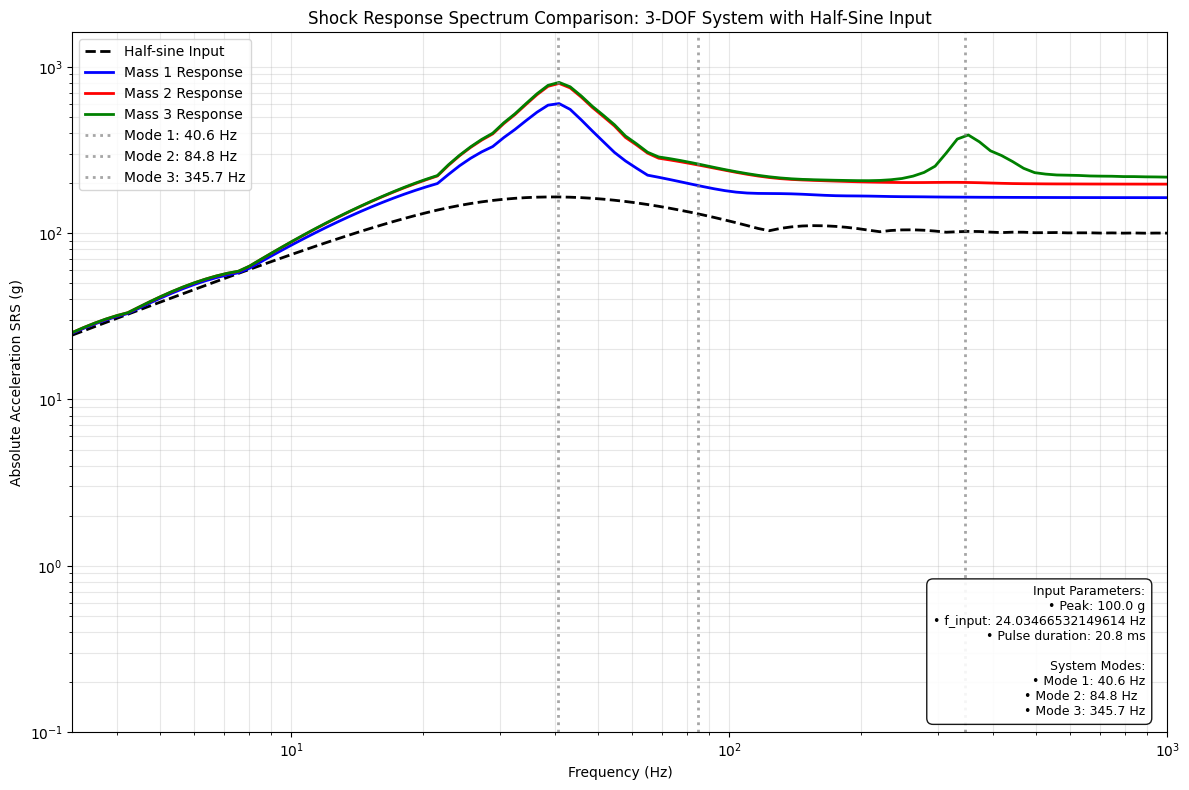


SRS Computation Complete!
Input peak: 165.1 g at 38.5 Hz
Mass 1 peak: 601.4 g at 40.8 Hz
Mass 2 peak: 794.9 g at 40.8 Hz
Mass 3 peak: 806.3 g at 40.8 Hz


In [276]:
import numpy as np
import matplotlib.pyplot as plt

# SRS Comparison: Half-Sine Input vs 3-DOF Mass Responses

# Use the half-sine input and responses from cell 22
# (These should be available from the previous half-sine example)

# Get the half-sine input data - reconstruct from cell 22 parameters
f_input_srs = threedof.fn[0]/1.69  # Hz
T_pulse_srs = 1.0 / (2 * f_input_srs)
peak_srs = 100.0  # g

# Time parameters (match cell 22)
f_mode1_srs = threedof.fn[0]
cycles_srs = 5
mode_period_srs = 1.0 / f_mode1_srs
t_total_srs = T_pulse_srs + cycles_srs * mode_period_srs

# Sampling (match cell 22)
sample_factor_srs = 20
fs_srs = np.max(threedof.fn) * sample_factor_srs
t_srs = np.linspace(0, t_total_srs, int(t_total_srs * fs_srs))

# Recreate half-sine input
a_base_srs = np.zeros_like(t_srs)
mask_srs = t_srs <= T_pulse_srs
a_base_srs[mask_srs] = peak_srs * np.sin(np.pi * t_srs[mask_srs] / T_pulse_srs)

# Get 3-DOF response
t_out_srs, a_3d_srs = time_response(threedof, t_srs, a_base_srs)

# Define frequency range for SRS calculation
freq_srs_range = np.logspace(0.5, 3, 100)  # 3.16 Hz to 1000 Hz, 100 points

# Compute SRS for each signal
print("Computing SRS for half-sine input...")
srs_input = shock_response_spectrum(t_srs, a_base_srs, freq_srs_range)

print("Computing SRS for Mass 1 response...")
srs_mass1 = shock_response_spectrum(t_out_srs, a_3d_srs[0], freq_srs_range)

print("Computing SRS for Mass 2 response...")
srs_mass2 = shock_response_spectrum(t_out_srs, a_3d_srs[1], freq_srs_range)

print("Computing SRS for Mass 3 response...")
srs_mass3 = shock_response_spectrum(t_out_srs, a_3d_srs[2], freq_srs_range)

# Plot SRS comparison
plt.figure(figsize=(12, 8))

# Plot all SRS curves
plt.loglog(freq_srs_range, srs_input, 'k--', linewidth=2, label='Half-sine Input')
plt.loglog(freq_srs_range, srs_mass1, 'b-', linewidth=2, label='Mass 1 Response')
plt.loglog(freq_srs_range, srs_mass2, 'r-', linewidth=2, label='Mass 2 Response')
plt.loglog(freq_srs_range, srs_mass3, 'g-', linewidth=2, label='Mass 3 Response')

# Add vertical lines at modal frequencies
for j, fn in enumerate(threedof.fn):
    if fn <= 1000:  # Only show lines within frequency range
        plt.axvline(fn, color='gray', linestyle=':', alpha=0.7, 
                    label=f'Mode {j+1}: {fn:.1f} Hz' if j < 3 else None)

# Formatting
plt.xlabel('Frequency (Hz)')
plt.ylabel('Absolute Acceleration SRS (g)')
plt.title('Shock Response Spectrum Comparison: 3-DOF System with Half-Sine Input')
plt.grid(True, which="both", alpha=0.3)
plt.legend(loc='upper left', fontsize=10)
plt.xlim(freq_srs_range[0], freq_srs_range[-1])
plt.ylim(0.1, np.max([srs_input, srs_mass1, srs_mass2, srs_mass3]) * 2)

# Add info box with system parameters
info_box_text = f"""Input Parameters:
• Peak: {peak_srs} g
• f_input: {f_input_srs} Hz
• Pulse duration: {T_pulse_srs*1000:.1f} ms

System Modes:
• Mode 1: {threedof.fn[0]:.1f} Hz
• Mode 2: {threedof.fn[1]:.1f} Hz  
• Mode 3: {threedof.fn[2]:.1f} Hz"""

plt.text(0.98, 0.02, info_box_text, transform=plt.gca().transAxes, 
         fontsize=9, verticalalignment='bottom', horizontalalignment='right',
         bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.9))

plt.tight_layout()
plt.show()

print(f"\nSRS Computation Complete!")
print(f"Input peak: {np.max(srs_input):.1f} g at {freq_srs_range[np.argmax(srs_input)]:.1f} Hz")
print(f"Mass 1 peak: {np.max(srs_mass1):.1f} g at {freq_srs_range[np.argmax(srs_mass1)]:.1f} Hz")
print(f"Mass 2 peak: {np.max(srs_mass2):.1f} g at {freq_srs_range[np.argmax(srs_mass2)]:.1f} Hz")
print(f"Mass 3 peak: {np.max(srs_mass3):.1f} g at {freq_srs_range[np.argmax(srs_mass3)]:.1f} Hz")

🚀 Using FAST MODE for rapid iteration
Computing SRS comparison using FAST MODE (10x faster)
Computing SRS curves...
⚠️  Legacy mode 'fast' mapped to 'optimal'
  ✓ Input SRS complete
⚠️  Legacy mode 'fast' mapped to 'optimal'
  ✓ Input SRS complete
⚠️  Legacy mode 'fast' mapped to 'optimal'
  ✓ Mass 1 SRS complete
⚠️  Legacy mode 'fast' mapped to 'optimal'
  ✓ Mass 1 SRS complete
⚠️  Legacy mode 'fast' mapped to 'optimal'
  ✓ Mass 2 SRS complete
⚠️  Legacy mode 'fast' mapped to 'optimal'
  ✓ Mass 2 SRS complete
⚠️  Legacy mode 'fast' mapped to 'optimal'
  ✓ Mass 3 SRS complete
\nTotal SRS computation time: 7.7 seconds
\nSRS Peak Values:
  Input:  162.9 g at 35.0 Hz
  Mass 1: 602.6 g at 40.5 Hz
  Mass 2: 786.4 g at 40.5 Hz
  Mass 3: 804.2 g at 40.5 Hz
  ✓ Mass 3 SRS complete
\nTotal SRS computation time: 7.7 seconds
\nSRS Peak Values:
  Input:  162.9 g at 35.0 Hz
  Mass 1: 602.6 g at 40.5 Hz
  Mass 2: 786.4 g at 40.5 Hz
  Mass 3: 804.2 g at 40.5 Hz


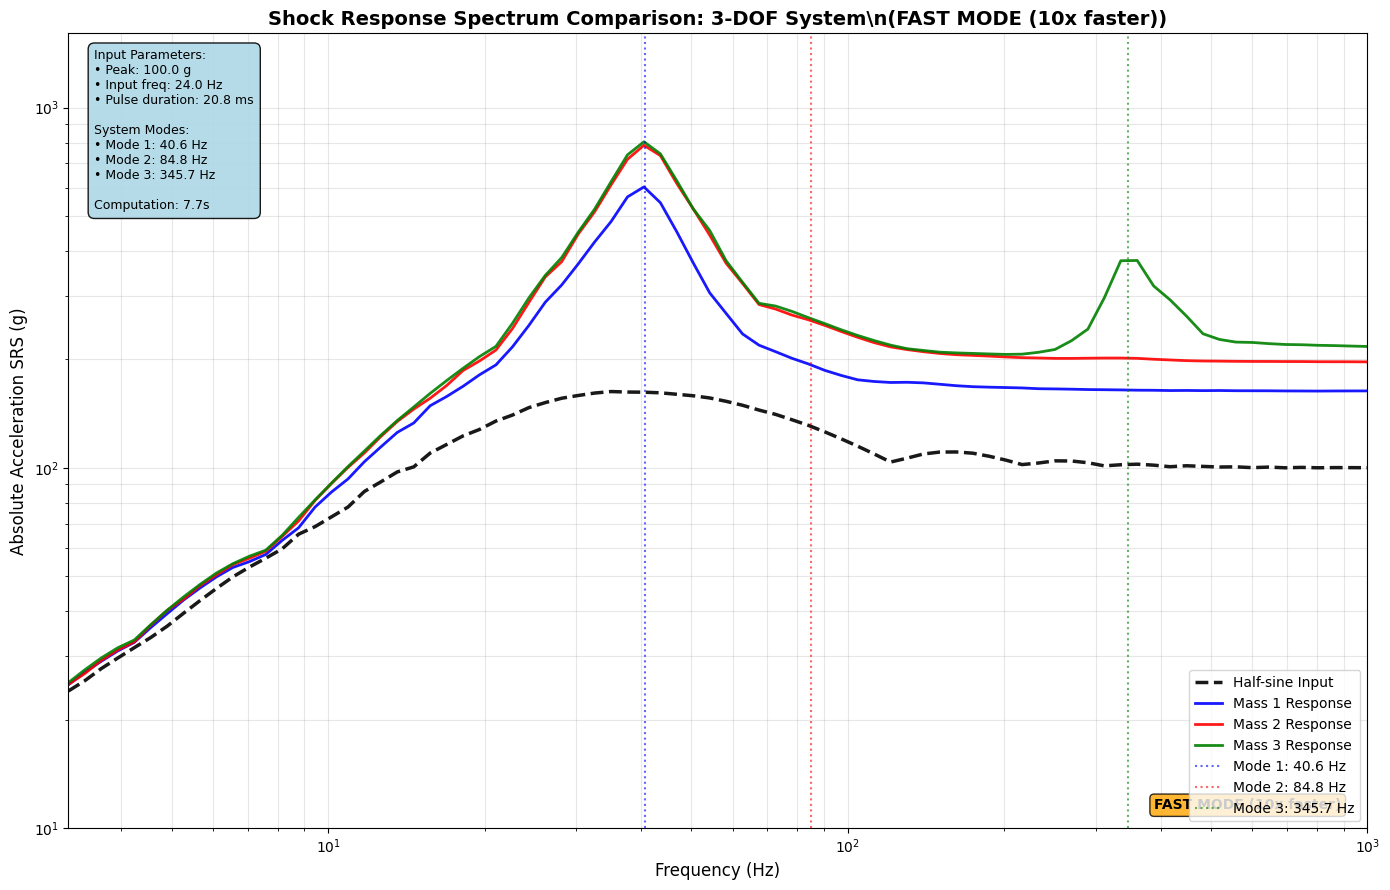

\n============================================================
✅ SRS ANALYSIS COMPLETE!
💨 Used fast mode for rapid iteration (7.7s)
💡 For final results, set USE_FAST_MODE = False


In [283]:
# 🚀 IMPROVED SRS COMPARISON: Fast Mode for Rapid Iteration
import numpy as np
import matplotlib.pyplot as plt
import time

# =============================================================================
# CONFIGURATION: Toggle between fast and accurate modes
# =============================================================================
USE_FAST_MODE = True    # ✅ Set to True for 10x faster computation during development
                        # ❌ Set to False for final high-accuracy results

if USE_FAST_MODE:
    srs_function = lambda t, a, f: shock_response_spectrum_fast(t, a, f, speed_level='fast')
    mode_label = "FAST MODE (10x faster)"
    print("🚀 Using FAST MODE for rapid iteration")
else:
    srs_function = shock_response_spectrum
    mode_label = "ACCURATE MODE (publication quality)"
    print("🎯 Using ACCURATE MODE for final results")

print("="*60)

# SRS Comparison: Half-Sine Input vs 3-DOF Mass Responses
print("Computing SRS comparison using", mode_label)

# Get half-sine input data (from previous cells)
f_input_srs = threedof.fn[0]/1.69  # Hz
T_pulse_srs = 1.0 / (2 * f_input_srs)
peak_srs = 100.0  # g

# Time parameters
f_mode1_srs = threedof.fn[0]
cycles_srs = 5
mode_period_srs = 1.0 / f_mode1_srs
t_total_srs = T_pulse_srs + cycles_srs * mode_period_srs

# Sampling
sample_factor_srs = 20
fs_srs = np.max(threedof.fn) * sample_factor_srs
t_srs = np.linspace(0, t_total_srs, int(t_total_srs * fs_srs))

# Create half-sine input
a_base_srs = np.zeros_like(t_srs)
mask_srs = t_srs <= T_pulse_srs
a_base_srs[mask_srs] = peak_srs * np.sin(np.pi * t_srs[mask_srs] / T_pulse_srs)

# Get 3-DOF response
t_out_srs, a_3d_srs = time_response(threedof, t_srs, a_base_srs)

# Define frequency range for SRS calculation
freq_srs_range = np.logspace(0.5, 3, 80)  # 3.16 Hz to 1000 Hz, 80 points

# Compute SRS for each signal with timing
start_time = time.time()

print("Computing SRS curves...")
srs_input = srs_function(t_srs, a_base_srs, freq_srs_range)
print("  ✓ Input SRS complete")

srs_mass1 = srs_function(t_out_srs, a_3d_srs[0], freq_srs_range)
print("  ✓ Mass 1 SRS complete")

srs_mass2 = srs_function(t_out_srs, a_3d_srs[1], freq_srs_range)
print("  ✓ Mass 2 SRS complete")

srs_mass3 = srs_function(t_out_srs, a_3d_srs[2], freq_srs_range)
print("  ✓ Mass 3 SRS complete")

computation_time = time.time() - start_time
print(f"\\nTotal SRS computation time: {computation_time:.1f} seconds")

# Find peaks for reporting
peak_input_idx = np.argmax(srs_input)
peak_m1_idx = np.argmax(srs_mass1) 
peak_m2_idx = np.argmax(srs_mass2)
peak_m3_idx = np.argmax(srs_mass3)

print(f"\\nSRS Peak Values:")
print(f"  Input:  {srs_input[peak_input_idx]:.1f} g at {freq_srs_range[peak_input_idx]:.1f} Hz")
print(f"  Mass 1: {srs_mass1[peak_m1_idx]:.1f} g at {freq_srs_range[peak_m1_idx]:.1f} Hz")
print(f"  Mass 2: {srs_mass2[peak_m2_idx]:.1f} g at {freq_srs_range[peak_m2_idx]:.1f} Hz") 
print(f"  Mass 3: {srs_mass3[peak_m3_idx]:.1f} g at {freq_srs_range[peak_m3_idx]:.1f} Hz")

# Enhanced plotting
plt.figure(figsize=(14, 9))

# Plot all SRS curves with enhanced styling
plt.loglog(freq_srs_range, srs_input, 'k--', linewidth=2.5, label='Half-sine Input', alpha=0.9)
plt.loglog(freq_srs_range, srs_mass1, 'b-', linewidth=2, label='Mass 1 Response', alpha=0.9)
plt.loglog(freq_srs_range, srs_mass2, 'r-', linewidth=2, label='Mass 2 Response', alpha=0.9)
plt.loglog(freq_srs_range, srs_mass3, 'g-', linewidth=2, label='Mass 3 Response', alpha=0.9)

# Add vertical lines at modal frequencies
colors_modal = ['blue', 'red', 'green']
for j, (fn, color) in enumerate(zip(threedof.fn, colors_modal)):
    if fn <= 1000:
        plt.axvline(fn, color=color, linestyle=':', alpha=0.6, linewidth=1.5,
                    label=f'Mode {j+1}: {fn:.1f} Hz' if j < 3 else None)

# Enhanced formatting
plt.xlabel('Frequency (Hz)', fontsize=12)
plt.ylabel('Absolute Acceleration SRS (g)', fontsize=12)
plt.title(f'Shock Response Spectrum Comparison: 3-DOF System\\n({mode_label})', 
          fontsize=14, fontweight='bold')
plt.grid(True, which="both", alpha=0.3)
plt.legend(loc='lower right', fontsize=10)
plt.xlim(freq_srs_range[0], freq_srs_range[-1])
plt.ylim(10, np.max([srs_input, srs_mass1, srs_mass2, srs_mass3]) * 2)

# Enhanced info box
info_text = f"""Input Parameters:
• Peak: {peak_srs} g
• Input freq: {f_input_srs:.1f} Hz  
• Pulse duration: {T_pulse_srs*1000:.1f} ms

System Modes:
• Mode 1: {threedof.fn[0]:.1f} Hz
• Mode 2: {threedof.fn[1]:.1f} Hz  
• Mode 3: {threedof.fn[2]:.1f} Hz

Computation: {computation_time:.1f}s"""

plt.text(0.02, 0.98, info_text, transform=plt.gca().transAxes, 
         verticalalignment='top', fontsize=9,
         bbox=dict(boxstyle='round,pad=0.5', facecolor='lightblue', alpha=0.9))

# Mode indicator
mode_color = 'orange' if USE_FAST_MODE else 'green'
plt.text(0.98, 0.02, mode_label, transform=plt.gca().transAxes,
         horizontalalignment='right', verticalalignment='bottom', fontsize=10, fontweight='bold',
         bbox=dict(boxstyle='round,pad=0.3', facecolor=mode_color, alpha=0.8))

plt.tight_layout()
plt.show()

print(f"\\n{'='*60}")
print(f"✅ SRS ANALYSIS COMPLETE!")
if USE_FAST_MODE:
    print(f"💨 Used fast mode for rapid iteration ({computation_time:.1f}s)")
    print(f"💡 For final results, set USE_FAST_MODE = False")
else:
    print(f"🎯 Used accurate mode for publication-quality results ({computation_time:.1f}s)")
print(f"{'='*60}")

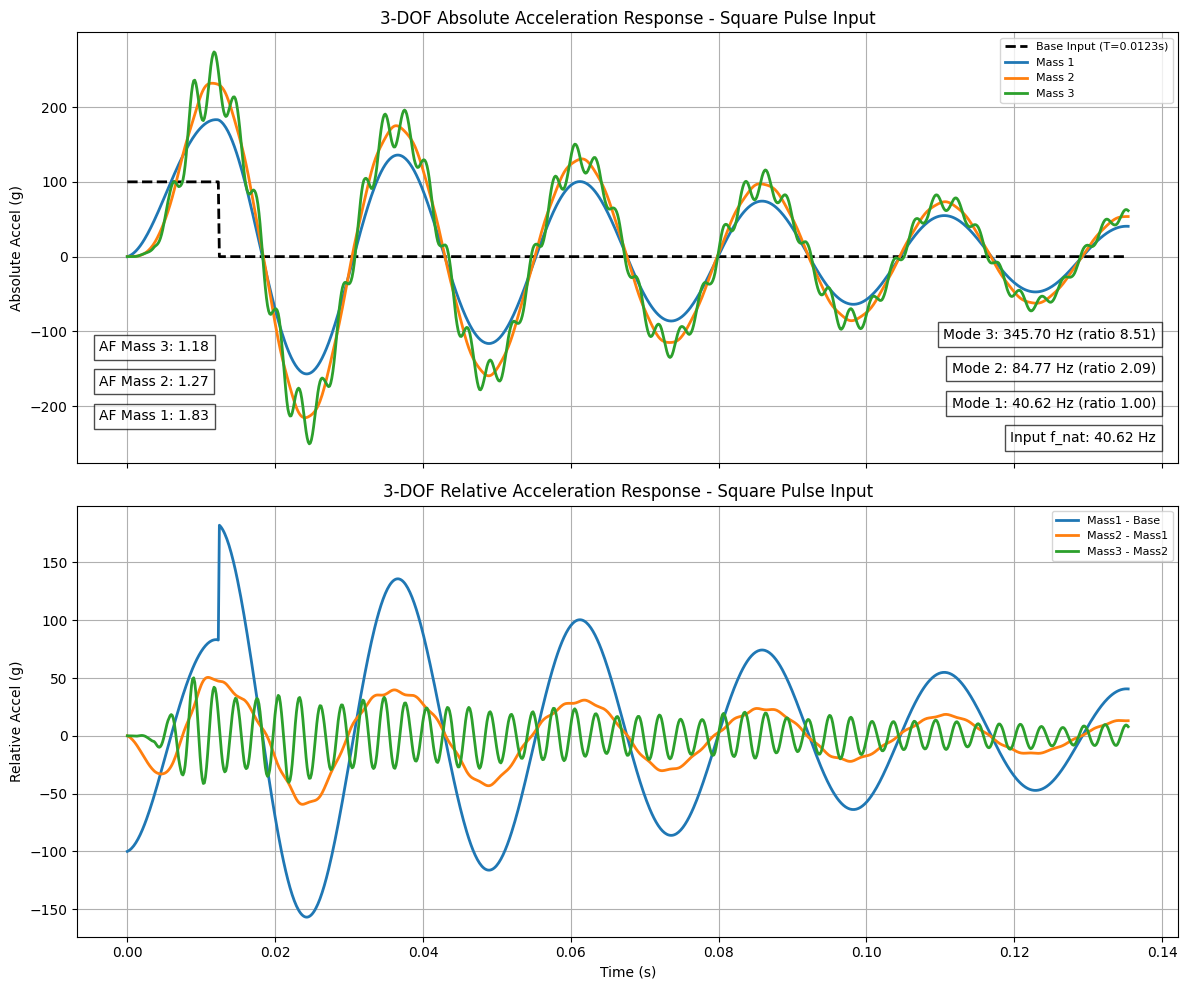

In [278]:
import numpy as np
import matplotlib.pyplot as plt

# 3-DOF Square Pulse Base Excitation Response

# Determine modal frequencies
f_mode1 = threedof.fn[0]          # lowest mode
f_mode_max = np.max(threedof.fn)  # highest mode

# Square pulse parameters
peak = 100.0                     # peak acceleration (g)

# Input natural frequency (Hz) - modify as desired
f_input = f_mode1                   # input natural frequency (Hz)
T_pulse = 1.0 / (2 * f_input)    # square pulse half-period (pulse duration)

# Total duration: input pulse + ringdown cycles based on lowest mode
cycles = 5                       # number of lowest-mode cycles to display
mode_period = 1.0 / f_mode1      # period of lowest mode
t_total = T_pulse + cycles * mode_period

# Sampling rate: highest mode * factor for smoothness
sample_factor = 20               # samples per cycle of highest mode
fs = f_mode_max * sample_factor

# Time vector
t = np.linspace(0, t_total, int(t_total * fs))

# Base acceleration: square pulse during pulse duration, zero after
a_base = np.zeros_like(t)
mask = t <= T_pulse
a_base[mask] = peak  # Square pulse - constant amplitude during pulse

# Compute 3-DOF time response
t_out, a_3d = time_response(threedof, t, a_base)

# Calculate amplification factors: peak absolute accel ratios
af1 = np.max(np.abs(a_3d[0])) / np.max(np.abs(a_base))
af2 = np.max(np.abs(a_3d[1])) / np.max(np.abs(a_3d[0]))
af3 = np.max(np.abs(a_3d[2])) / np.max(np.abs(a_3d[1]))

# Plot absolute and relative accelerations
fig, axs = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Absolute response
axs[0].plot(t, a_base, 'k--', label=f'Base Input (T={T_pulse:.4f}s)')
for idx in range(a_3d.shape[0]):
    axs[0].plot(t_out, a_3d[idx], label=f'Mass {idx+1}')
axs[0].set_ylabel('Absolute Accel (g)')
axs[0].set_title('3-DOF Absolute Acceleration Response - Square Pulse Input')
axs[0].legend(loc='upper right', fontsize=8)
axs[0].grid(True)

# Annotate amplification factors in lower-left
text_y_start = 0.1
spacing = 0.08
for idx, af in enumerate([af1, af2, af3]):
    axs[0].text(0.02, text_y_start + idx * spacing,
                f'AF Mass {idx+1}: {af:.2f}',
                transform=axs[0].transAxes,
                fontsize=10, bbox=dict(facecolor='white', alpha=0.7))

# Annotate input and mode natural frequencies in lower-right
text_x = 0.98
text_y_start_r = 0.05
freq_lines = [f'Input f_nat: {f_input:.2f} Hz'] + [
    f'Mode {j+1}: {fn:.2f} Hz (ratio {fn/f_input:.2f})' for j, fn in enumerate(threedof.fn)
]
for j, line in enumerate(freq_lines):
    axs[0].text(text_x, text_y_start_r + j * spacing,
                line, transform=axs[0].transAxes,
                ha='right', fontsize=10,
                bbox=dict(facecolor='white', alpha=0.7))

# Relative accelerations: mass1-base, mass2-mass1, mass3-mass2
a_rel1 = a_3d[0] - a_base
a_rel2 = a_3d[1] - a_3d[0]
a_rel3 = a_3d[2] - a_3d[1]
axs[1].plot(t_out, a_rel1, label='Mass1 - Base')
axs[1].plot(t_out, a_rel2, label='Mass2 - Mass1')
axs[1].plot(t_out, a_rel3, label='Mass3 - Mass2')
axs[1].set_ylabel('Relative Accel (g)')
axs[1].set_title('3-DOF Relative Acceleration Response - Square Pulse Input')
axs[1].set_xlabel('Time (s)')
axs[1].legend(loc='upper right', fontsize=8)
axs[1].grid(True)

plt.tight_layout()
plt.show()

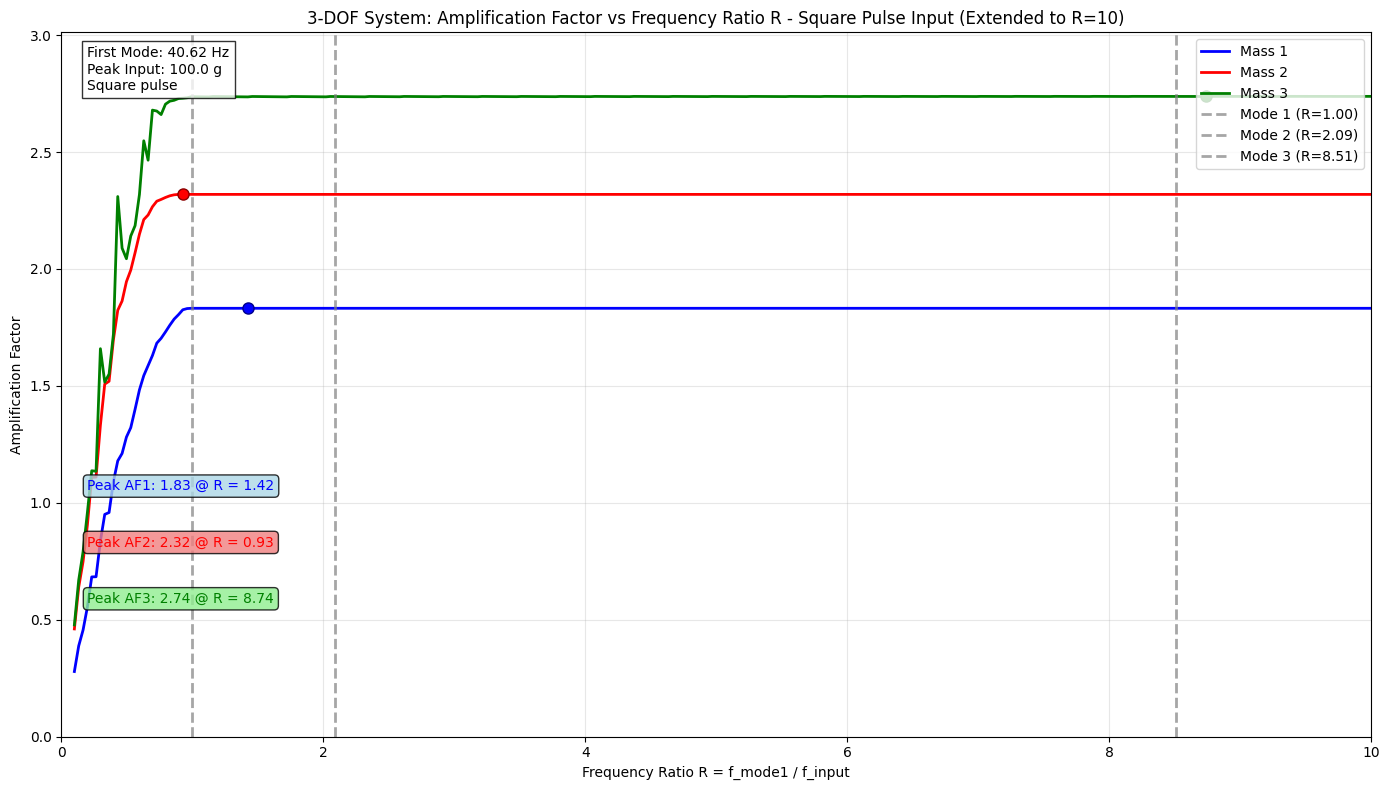

In [279]:
# Frequency Ratio (R) Study: Amplification Factor vs R - Square Pulse Input
# R = f_mode1 / f_input, where R ranges from 0.1 to 10

import numpy as np
import matplotlib.pyplot as plt

# Parameters
f_mode1 = threedof.fn[0]  # first mode frequency
peak = 100.0              # peak acceleration (g)

# Define R range (0.1 to 10) and corresponding input frequencies
R_values = np.linspace(0.1, 10.0, 300)  # Extended to 10 with more points for smoothness
f_input_values = f_mode1 / R_values     # f_input = f_mode1 / R

# Storage arrays for amplification factors
AF_mass1_sq = np.zeros_like(R_values)
AF_mass2_sq = np.zeros_like(R_values)
AF_mass3_sq = np.zeros_like(R_values)

# Loop through each input frequency
for i, f_input in enumerate(f_input_values):
    # Square pulse parameters
    T_pulse = 1.0 / (2 * f_input)  # pulse duration
    
    # Time parameters
    cycles = 3  # reduced for speed
    mode_period = 1.0 / f_mode1
    t_total = T_pulse + cycles * mode_period
    
    # Sampling
    sample_factor = 15  # reduced for speed
    fs = np.max(threedof.fn) * sample_factor
    t = np.linspace(0, t_total, int(t_total * fs))
    
    # Base acceleration: square pulse (constant amplitude during pulse)
    a_base = np.zeros_like(t)
    mask = t <= T_pulse
    a_base[mask] = peak  # Square pulse - constant amplitude
    
    # Compute response
    t_out, a_3d = time_response(threedof, t, a_base)
    
    # Calculate amplification factors
    AF_mass1_sq[i] = np.max(np.abs(a_3d[0])) / np.max(np.abs(a_base))
    AF_mass2_sq[i] = np.max(np.abs(a_3d[1])) / np.max(np.abs(a_base))
    AF_mass3_sq[i] = np.max(np.abs(a_3d[2])) / np.max(np.abs(a_base))

# Find peak amplification factors and their R values
peak_AF1_sq_idx = np.argmax(AF_mass1_sq)
peak_AF1_sq_R = R_values[peak_AF1_sq_idx]
peak_AF1_sq_value = AF_mass1_sq[peak_AF1_sq_idx]

peak_AF2_sq_idx = np.argmax(AF_mass2_sq)
peak_AF2_sq_R = R_values[peak_AF2_sq_idx]
peak_AF2_sq_value = AF_mass2_sq[peak_AF2_sq_idx]

peak_AF3_sq_idx = np.argmax(AF_mass3_sq)
peak_AF3_sq_R = R_values[peak_AF3_sq_idx]
peak_AF3_sq_value = AF_mass3_sq[peak_AF3_sq_idx]

# Plot amplification factors vs frequency ratio R
plt.figure(figsize=(14, 8))
plt.plot(R_values, AF_mass1_sq, 'b-', label='Mass 1', linewidth=2)
plt.plot(R_values, AF_mass2_sq, 'r-', label='Mass 2', linewidth=2)
plt.plot(R_values, AF_mass3_sq, 'g-', label='Mass 3', linewidth=2)

# Mark peak points on each curve
plt.plot(peak_AF1_sq_R, peak_AF1_sq_value, 'bo', markersize=8, markerfacecolor='blue', markeredgecolor='darkblue')
plt.plot(peak_AF2_sq_R, peak_AF2_sq_value, 'ro', markersize=8, markerfacecolor='red', markeredgecolor='darkred')
plt.plot(peak_AF3_sq_R, peak_AF3_sq_value, 'go', markersize=8, markerfacecolor='green', markeredgecolor='darkgreen')

# Add vertical lines at mode ratios
for j, fn in enumerate(threedof.fn):
    R_mode = fn / f_mode1
    if R_mode <= 10:  # Only show lines within the plot range
        plt.axvline(R_mode, color='gray', linestyle='--', alpha=0.7, 
                    label=f'Mode {j+1} (R={R_mode:.2f})' if j < 3 else None)

plt.xlabel('Frequency Ratio R = f_mode1 / f_input')
plt.ylabel('Amplification Factor')
plt.title('3-DOF System: Amplification Factor vs Frequency Ratio R - Square Pulse Input (Extended to R=10)')
plt.grid(True, alpha=0.3)
plt.legend(loc='upper right')
plt.xlim(0, 10)  # Extended x-axis to 10
plt.ylim(0, np.max([AF_mass1_sq, AF_mass2_sq, AF_mass3_sq]) * 1.1)

# Add peak annotation boxes in lower left (no arrows)
peak_box_x = 0.02  # x position in axes coordinates
peak_box_y_start = 0.35  # starting y position
peak_box_spacing = 0.08  # vertical spacing between boxes

# Mass 1 peak info
plt.text(peak_box_x, peak_box_y_start, f'Peak AF1: {peak_AF1_sq_value:.2f} @ R = {peak_AF1_sq_R:.2f}',
         transform=plt.gca().transAxes, fontsize=10, color='blue',
         bbox=dict(boxstyle='round,pad=0.3', facecolor='lightblue', alpha=0.8))

# Mass 2 peak info
plt.text(peak_box_x, peak_box_y_start - peak_box_spacing, f'Peak AF2: {peak_AF2_sq_value:.2f} @ R = {peak_AF2_sq_R:.2f}',
         transform=plt.gca().transAxes, fontsize=10, color='red',
         bbox=dict(boxstyle='round,pad=0.3', facecolor='lightcoral', alpha=0.8))

# Mass 3 peak info
plt.text(peak_box_x, peak_box_y_start - 2*peak_box_spacing, f'Peak AF3: {peak_AF3_sq_value:.2f} @ R = {peak_AF3_sq_R:.2f}',
         transform=plt.gca().transAxes, fontsize=10, color='green',
         bbox=dict(boxstyle='round,pad=0.3', facecolor='lightgreen', alpha=0.8))

# Add annotation box with system info
info_text = f'First Mode: {f_mode1:.2f} Hz\nPeak Input: {peak} g\nSquare pulse'
plt.text(0.02, 0.98, info_text, transform=plt.gca().transAxes, 
         verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()